In [4]:
import pandas as pd
import numpy as np
data=pd.read_excel('Walmart_Sales_CB1799BACC.xlsx')
data


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46:00,Ewallet,6.2
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16:00,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22:00,Cash,7.7
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33:00,Cash,4.1


#Analyze the performance of sales and revenue at the city and branch level

In [8]:
import pandas as pd

# Load data into a DataFrame
data=pd.read_excel('Walmart_Sales_CB1799BACC.xlsx')
data

# Add a revenue column (Unit price * Quantity)
data['Revenue'] = data['Unit price'] * data['Quantity']

# Group by City and Branch to calculate total sales and total revenue
city_branch_performance = data.groupby(['City', 'Branch']).agg(
    Total_Sales=('Invoice ID', 'count'),   # Count the number of invoices as Total Sales
    Total_Revenue=('Revenue', 'sum')       # Sum of revenue
).reset_index()

# Display the results
print(city_branch_performance)


        City Branch  Total_Sales  Total_Revenue
0   Mandalay      A          119       34130.09
1   Mandalay      B          118       37215.93
2   Mandalay      C           95       29794.62
3  Naypyitaw      A          110       35985.64
4  Naypyitaw      B          109       35157.75
5  Naypyitaw      C          109       34160.14
6     Yangon      A          114       33647.27
7     Yangon      B          113       35193.51
8     Yangon      C          113       32302.43


In [9]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46:00,Ewallet,6.2,40.35
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16:00,Ewallet,4.4,973.80
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22:00,Cash,7.7,31.84
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33:00,Cash,4.1,65.82


**Average price of an item sold at each branch of the city**

In [10]:
# Group by City and Branch and calculate the average price per item
avg_price_per_item = data.groupby(['City', 'Branch']).agg(
    Avg_Unit_Price=('Unit price', 'mean')  # Average unit price
).reset_index()

# Display the average price of items sold at each branch in the city
print(avg_price_per_item)



        City Branch  Avg_Unit_Price
0   Mandalay      A       53.353866
1   Mandalay      B       56.133305
2   Mandalay      C       57.958316
3  Naypyitaw      A       54.123182
4  Naypyitaw      B       57.785688
5  Naypyitaw      C       57.941009
6     Yangon      A       55.639298
7     Yangon      B       56.011062
8     Yangon      C       52.684602


**C. Analyze Month-over-Month Performance of Sales and Revenue Across Product Line, Gender, and Payment Method**

In [12]:
# Convert 'Date' column to datetime format and extract the month
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Month'] = data['Date'].dt.month

# Group by Month, Product line, Gender, and Payment to calculate total sales and revenue
month_performance = data.groupby(['Month', 'Product line', 'Gender', 'Payment']).agg(
    Total_Sales=('Invoice ID', 'count'),    # Total sales for the month
    Total_Revenue=('Revenue', 'sum')        # Total revenue for the month
).reset_index()

# Display the Month-over-Month sales and revenue performance
print(month_performance)


     Month            Product line  Gender      Payment  Total_Sales  \
0        1  Electronic accessories  Female         Cash            9   
1        1  Electronic accessories  Female  Credit card            7   
2        1  Electronic accessories  Female      Ewallet            7   
3        1  Electronic accessories    Male         Cash           10   
4        1  Electronic accessories    Male  Credit card            8   
..     ...                     ...     ...          ...          ...   
103      3       Sports and travel  Female  Credit card            9   
104      3       Sports and travel  Female      Ewallet            8   
105      3       Sports and travel    Male         Cash            8   
106      3       Sports and travel    Male  Credit card            8   
107      3       Sports and travel    Male      Ewallet           14   

     Total_Revenue  
0          2731.86  
1          3045.42  
2          1576.48  
3          3380.29  
4          2248.65  
..       

In [15]:
# Save the result to a CSV file
month_performance.to_csv('month_over_month_performance.csv', index=False)

# Output file saved
print("Month-over-Month performance has been saved to 'month_over_month_performance.csv'")

Month-over-Month performance has been saved to 'month_over_month_performance.csv'


In [55]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# # Plot the Month-over-Month performance
# plt.figure(figsize=(20, 20))

# # Sales Plot
# plt.subplot(2, 1, 1)
# sns.lineplot(data=month_performance, x='Month', y='Total_Sales', hue='Product line', style='Gender', markers=True)
# plt.title('Month-over-Month Sales Performance by Product Line and Gender')
# plt.xlabel('Month')
# plt.ylabel('Total Sales')

# # Revenue Plot
# plt.subplot(2, 1, 2)
# sns.lineplot(data=month_performance, x='Month', y='Total_Revenue', hue='Payment', style='Gender', markers=True)
# plt.title('Month-over-Month Revenue Performance by Payment Method and Gender')
# plt.xlabel('Month')
# plt.ylabel('Total Revenue')

# # Adjust layout and display the plot
# plt.tight_layout()
# plt.show()

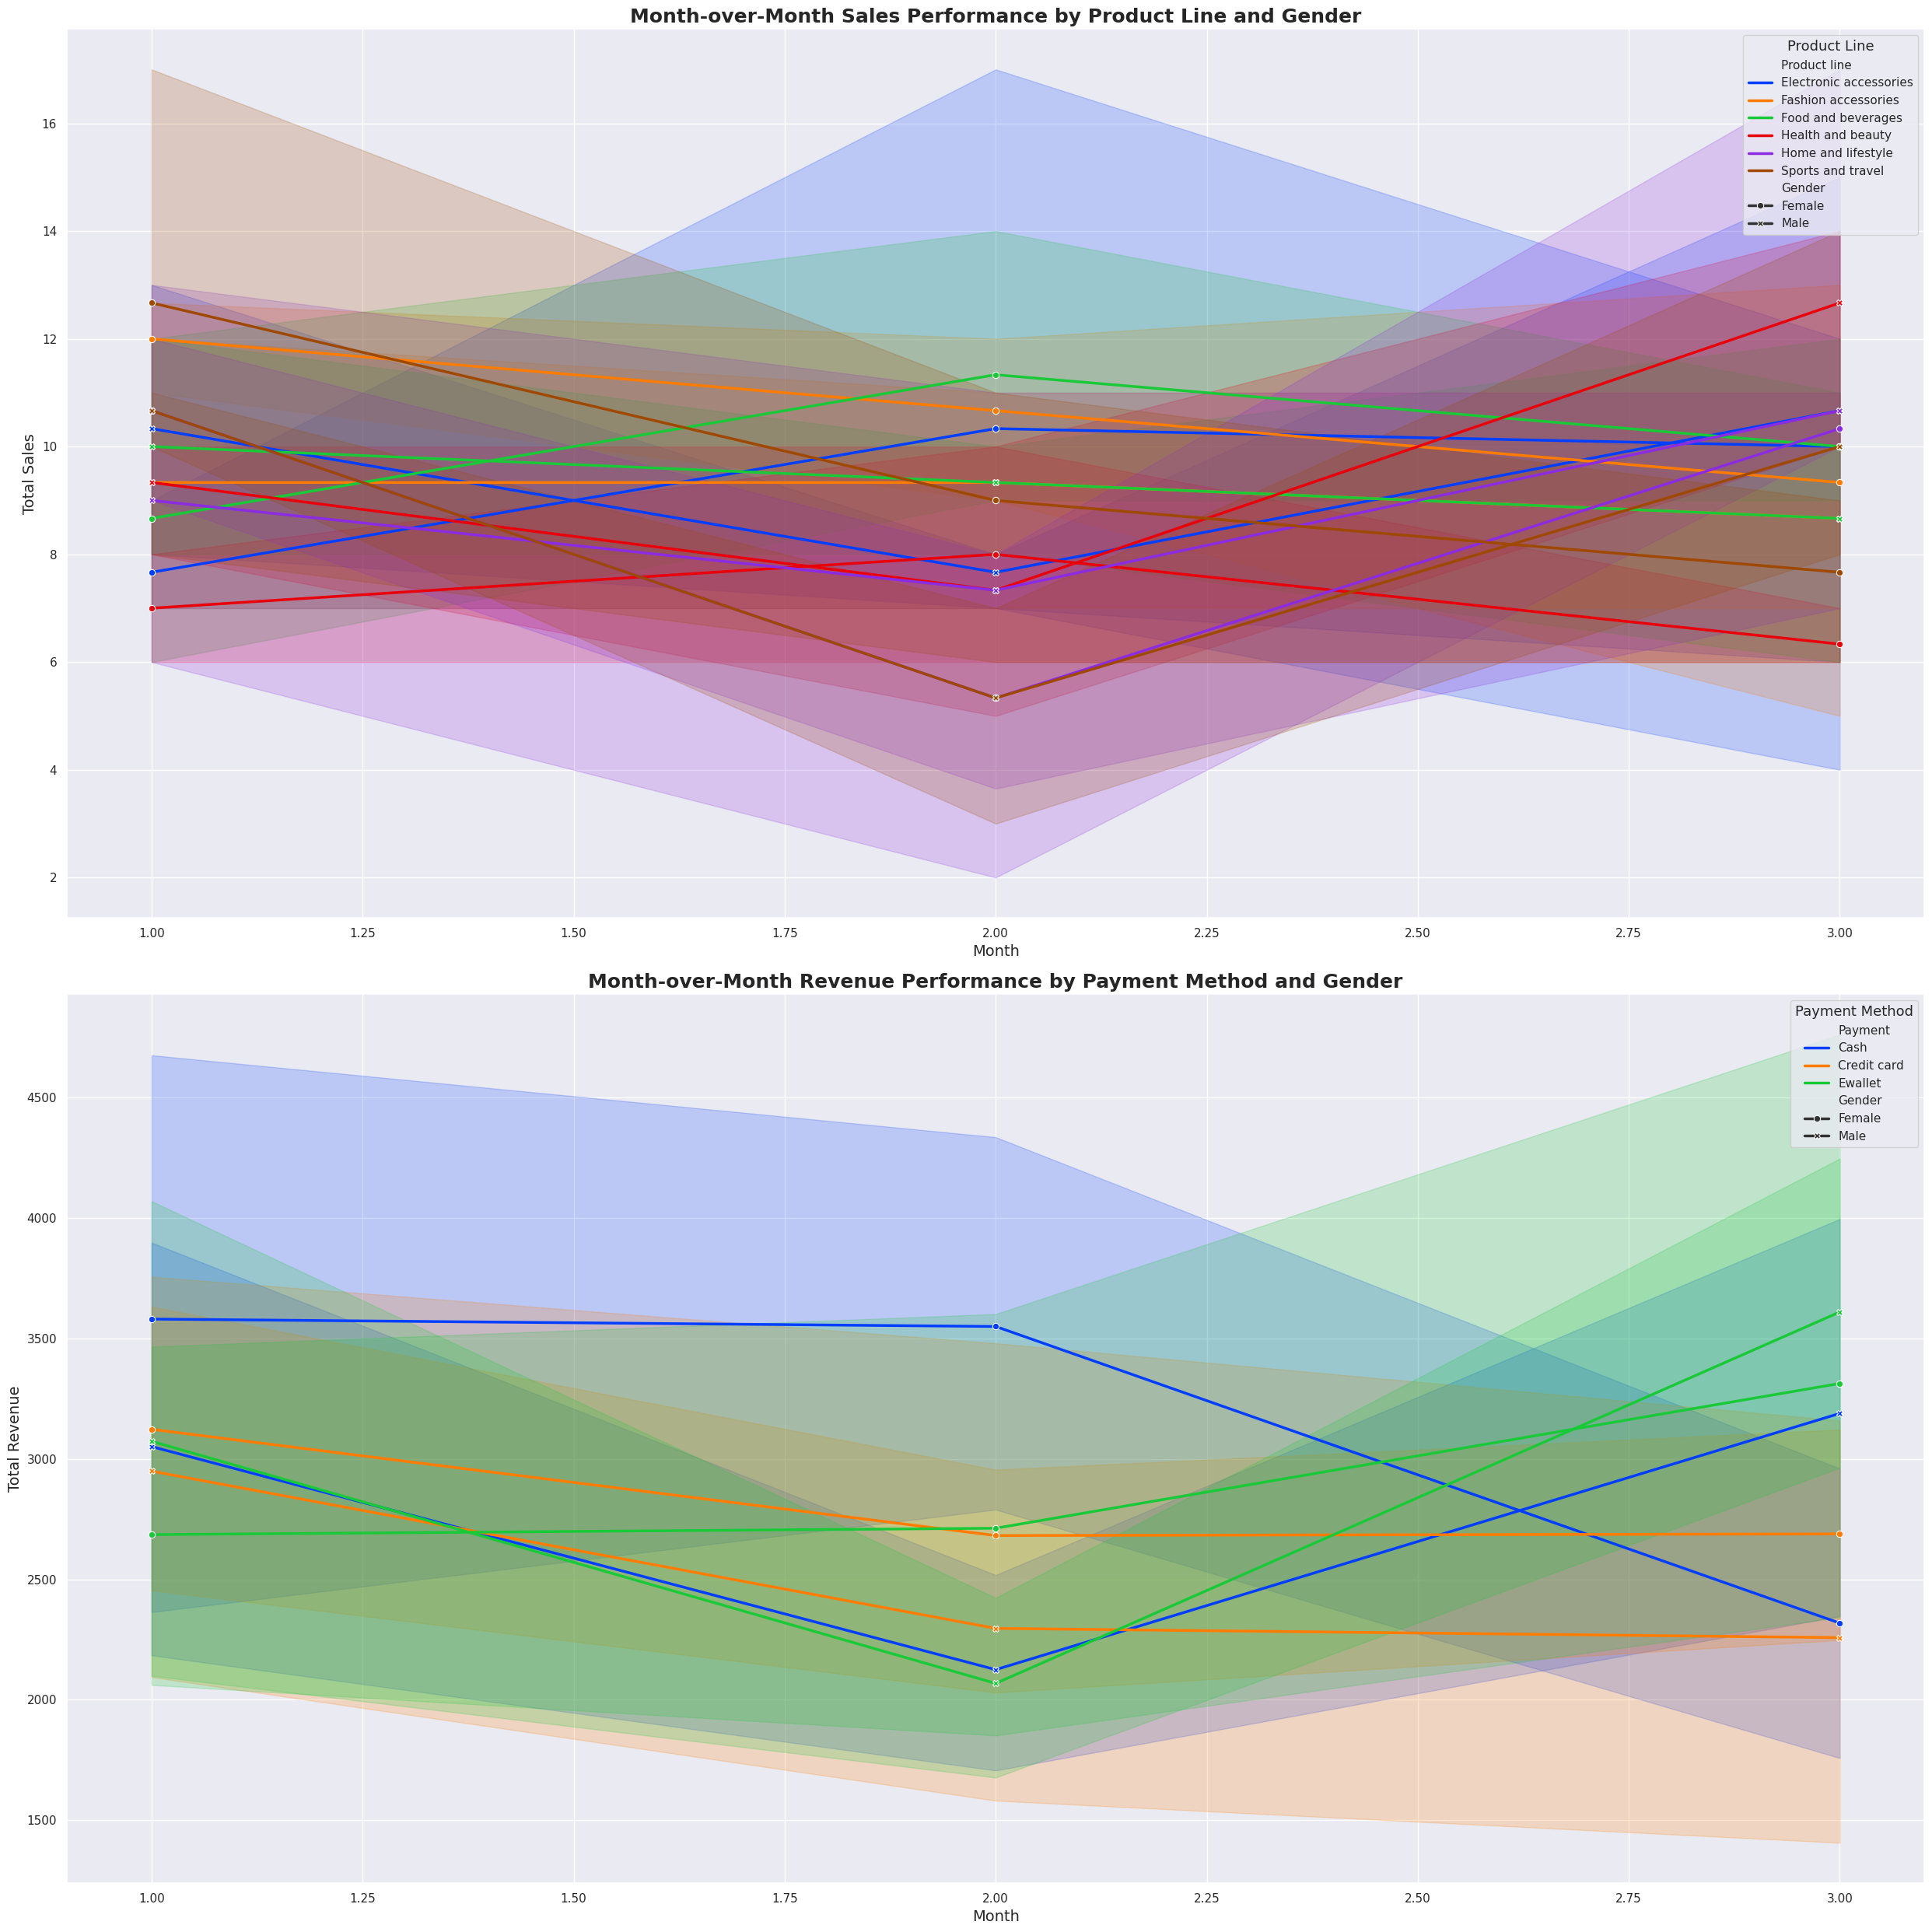

In [18]:
# Set plot style and color palette for attractiveness
sns.set(style="darkgrid", palette="bright")

# Create a figure for the subplots
plt.figure(figsize=(25, 25))

# 1. Sales Plot with enhanced visuals
plt.subplot(2, 1, 1)
sns.lineplot(data=month_performance, x='Month', y='Total_Sales', hue='Product line',
             style='Gender', markers=True, dashes=False, linewidth=2.5)

# Add title and labels with a larger font size for attractiveness
plt.title('Month-over-Month Sales Performance by Product Line and Gender', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Customize the legend
plt.legend(title='Product Line', title_fontsize='13', fontsize='11')

# 2. Revenue Plot with enhanced visuals
plt.subplot(2, 1, 2)
sns.lineplot(data=month_performance, x='Month', y='Total_Revenue', hue='Payment',
             style='Gender', markers=True, dashes=False, linewidth=2.5)

# Add title and labels
plt.title('Month-over-Month Revenue Performance by Payment Method and Gender', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)

# Customize the legend
plt.legend(title='Payment Method', title_fontsize='13', fontsize='11')

# Adjust layout and display the plot
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-19-00b308f9aa15>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=month_performance, x='Month', y='Total_Sales', hue='Product line', ci=None)
<ipython-input-19-00b308f9aa15>:19: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data=month_performance, x='Month', y='Total_Revenue', hue='Payment',


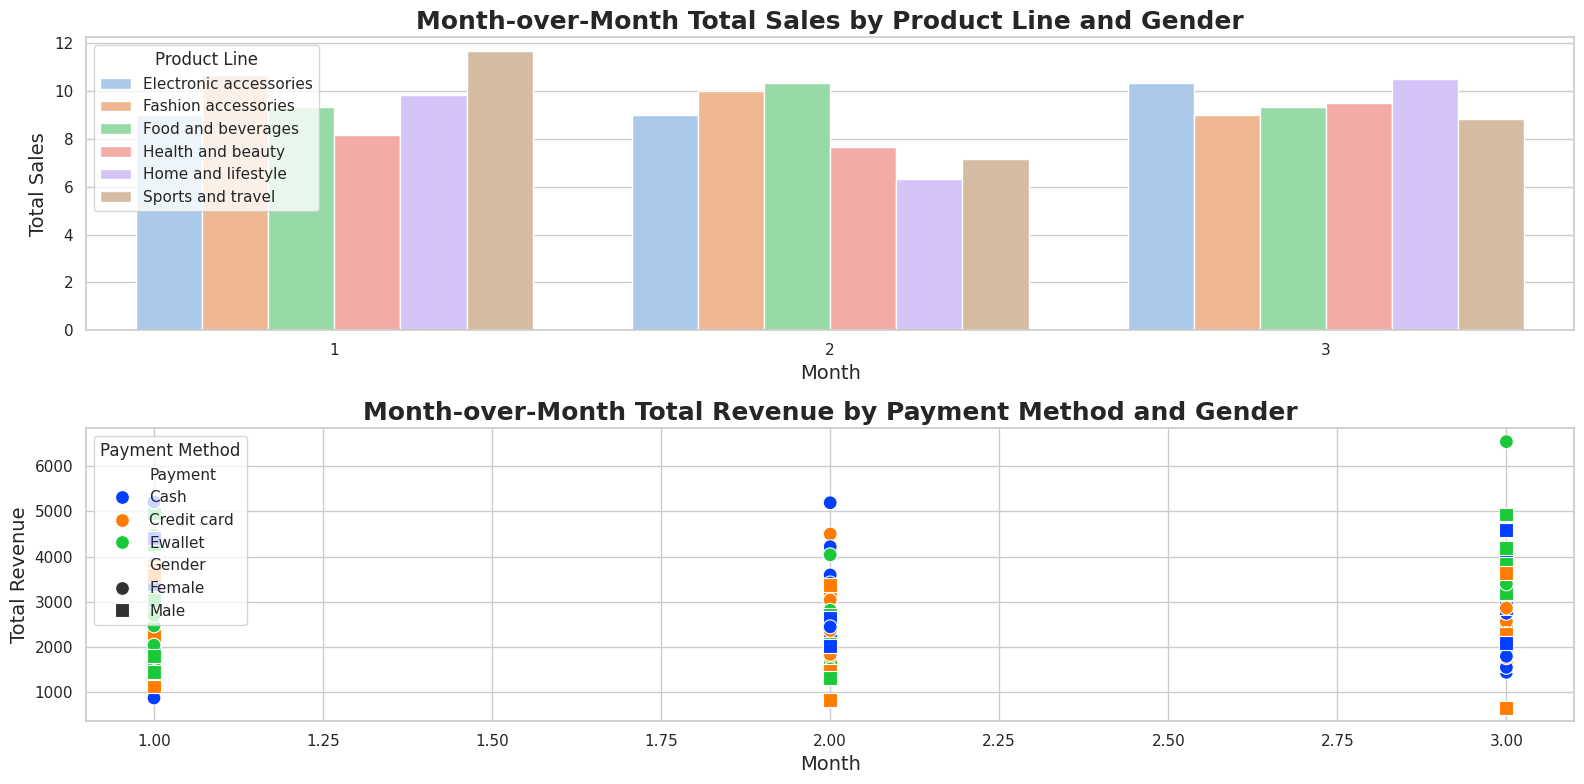

In [19]:
# Set plot style and color palette for attractiveness
sns.set(style="whitegrid", palette="pastel")

# 1. Bar Plot for Total Sales by Month, Product Line, and Gender
plt.figure(figsize=(16, 8))

# Bar plot for Total Sales
plt.subplot(2, 1, 1)
sns.barplot(data=month_performance, x='Month', y='Total_Sales', hue='Product line', ci=None)

# Add title and labels
plt.title('Month-over-Month Total Sales by Product Line and Gender', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='Product Line', loc='upper left')

# 2. Scatter Bar Plot for Total Revenue by Month, Payment Method, and Gender
plt.subplot(2, 1, 2)
sns.scatterplot(data=month_performance, x='Month', y='Total_Revenue', hue='Payment',
                style='Gender', s=100, markers=["o", "s", "D"], palette="bright")

# Add title and labels
plt.title('Month-over-Month Total Revenue by Payment Method and Gender', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.legend(title='Payment Method', loc='upper left')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [56]:
# # Set plot style and color palette
# sns.set(style="whitegrid", palette="pastel")

# # 1. Bar Plot for Total Sales by Month, Product Line, and Gender
# plt.figure(figsize=(16, 10))

# # Bar plot for Total Sales
# plt.subplot(2, 1, 1)
# sns.barplot(data=month_performance, x='Month', y='Total_Sales', hue='Product line', ci=None,
#             palette="muted", dodge=True, hue_order=month_performance['Product line'].unique())

# # Add title and labels
# plt.title('Month-over-Month Total Sales by Product Line and Gender', fontsize=18, weight='bold')
# plt.xlabel('Month', fontsize=14)
# plt.ylabel('Total Sales', fontsize=14)
# plt.legend(title='Product Line', loc='upper left')

# # Add gender bars on top (stacked or dodge format)
# sns.barplot(data=month_performance, x='Month', y='Total_Sales', hue='Gender', ci=None,
#             palette="bright", dodge=False, alpha=0.7)

# # 2. Scatter Bar Plot for Total Revenue by Month, Payment Method, and Gender
# plt.subplot(2, 1, 2)
# sns.scatterplot(data=month_performance, x='Month', y='Total_Revenue', hue='Payment',
#                 style='Gender', s=200, markers=["o", "s", "D"], palette="bright", edgecolor="black")

# # Add title and labels
# plt.title('Month-over-Month Total Revenue by Payment Method and Gender', fontsize=18, weight='bold')
# plt.xlabel('Month', fontsize=14)
# plt.ylabel('Total Revenue', fontsize=14)
# plt.legend(title='Payment Method', loc='upper left')

# # Adjust layout and show plot
# plt.tight_layout()
# plt.show()

<ipython-input-21-42a9532dc1a1>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=month_performance, x='Month', y='Total_Sales', hue='Gender',
<ipython-input-21-42a9532dc1a1>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=month_performance, x='Month', y='Total_Revenue', hue='Gender',


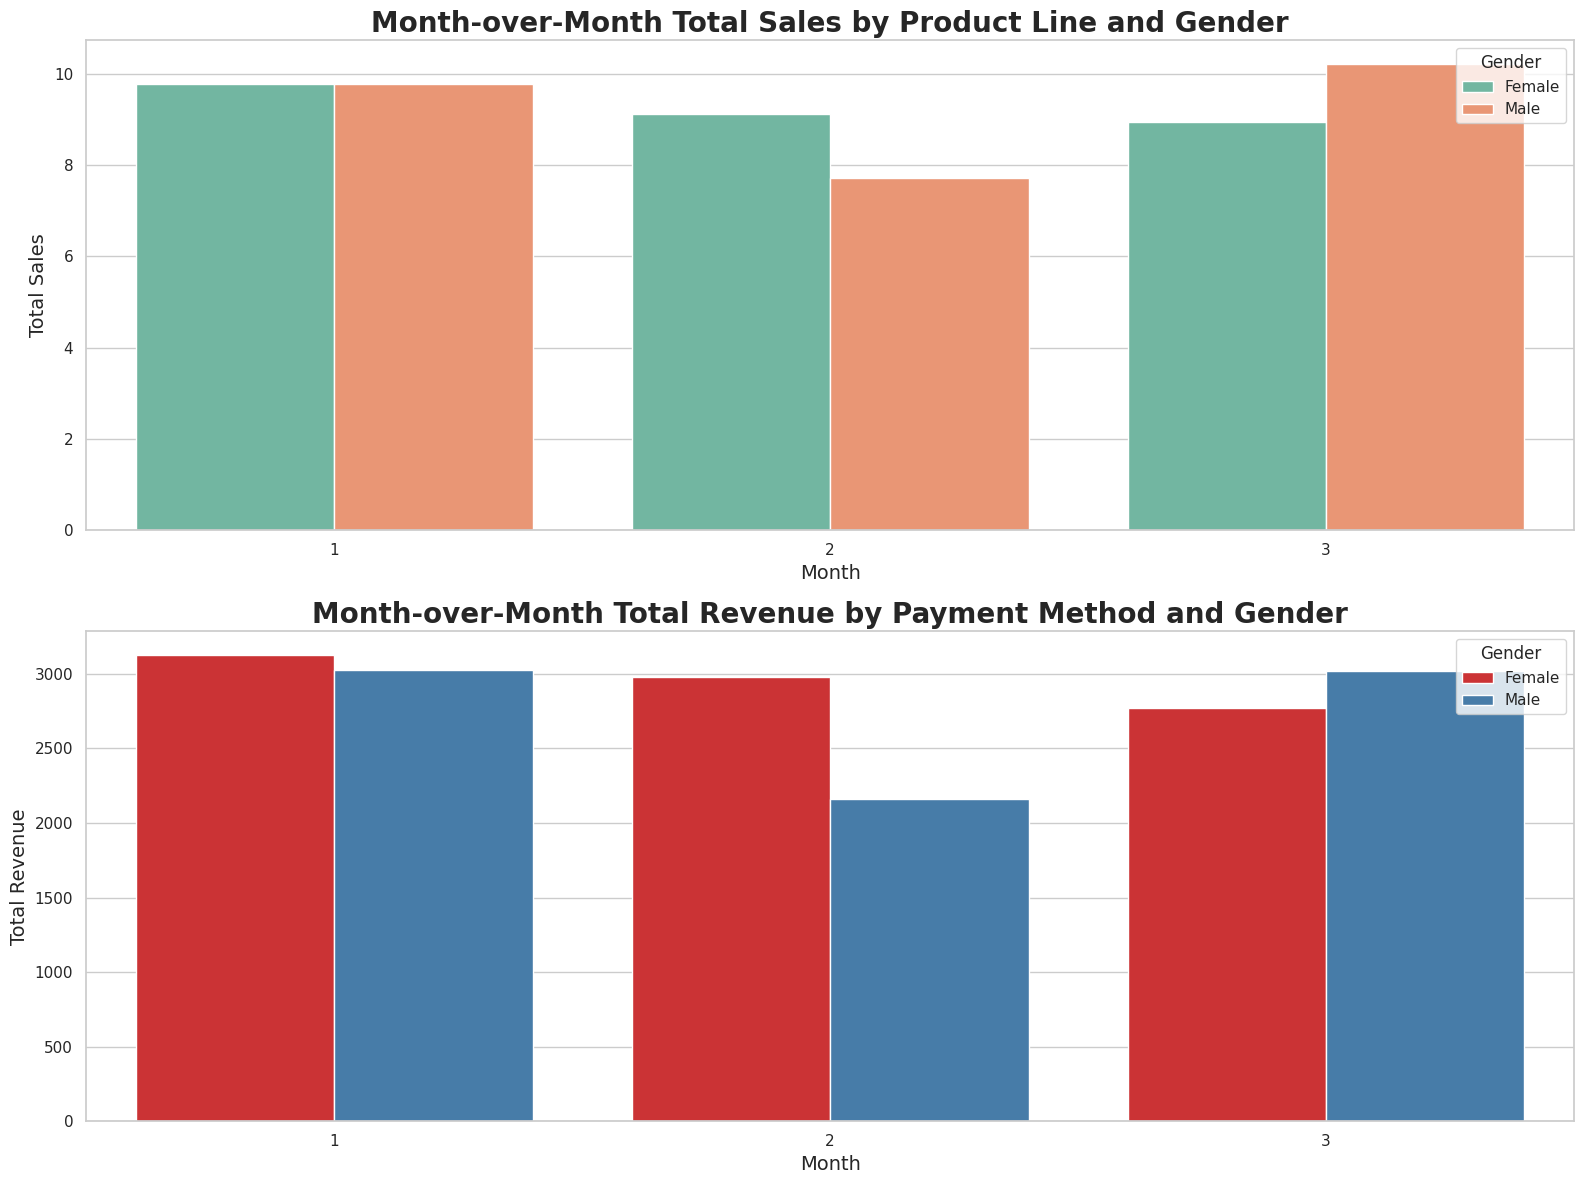

In [21]:
# Set plot style and simplified color palette
sns.set(style="whitegrid", palette="muted")

# Create a figure for the plots
plt.figure(figsize=(16, 12))

# 1. Month-over-Month Total Sales by Product Line and Gender
plt.subplot(2, 1, 1)
# Bar plot for Total Sales, with separate bars for Male and Female
sns.barplot(data=month_performance, x='Month', y='Total_Sales', hue='Gender',
            ci=None, palette="Set2", dodge=True)

# Add title and labels
plt.title('Month-over-Month Total Sales by Product Line and Gender', fontsize=20, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='Gender', loc='upper right')

# 2. Month-over-Month Total Revenue by Payment Method and Gender
plt.subplot(2, 1, 2)
# Bar plot for Total Revenue, with separate bars for Male and Female
sns.barplot(data=month_performance, x='Month', y='Total_Revenue', hue='Gender',
            ci=None, palette="Set1", dodge=True)

# Add title and labels
plt.title('Month-over-Month Total Revenue by Payment Method and Gender', fontsize=20, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.legend(title='Gender', loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


<ipython-input-23-24a987d7e487>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=month_performance, x='Month', y='Total_Revenue', hue='Payment',


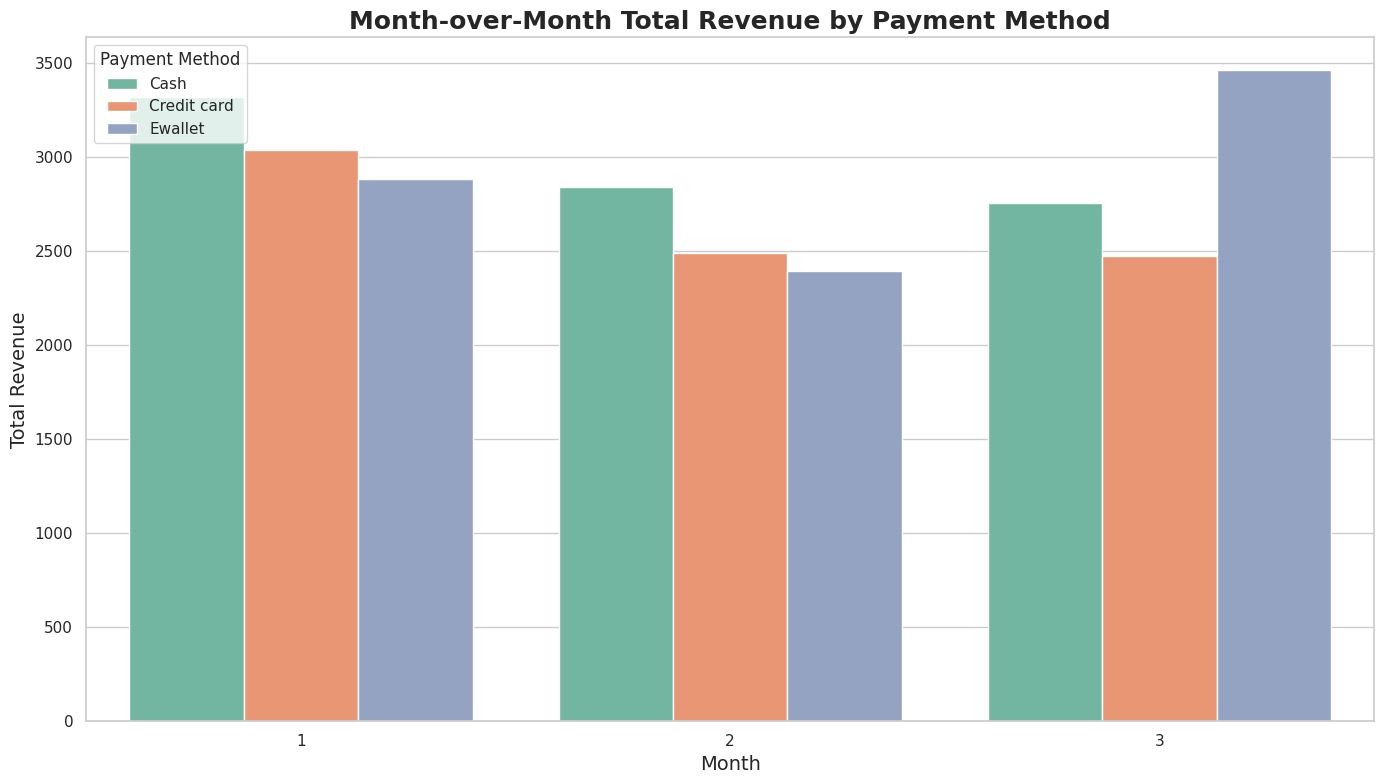

In [23]:
# Set plot style and color palette
sns.set(style="whitegrid", palette="pastel")

# Create a bar plot for Total Revenue by Payment Method and Month
plt.figure(figsize=(14, 8))
sns.barplot(data=month_performance, x='Month', y='Total_Revenue', hue='Payment',
            palette="Set2", ci=None)

# Add title and labels
plt.title('Month-over-Month Total Revenue by Payment Method', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.legend(title='Payment Method', loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

Identifying Focus Areas for Better Sales in April 2019

In [25]:
# Filter data for March and April
march_data = data[data['Month'] == 3]
april_data = data[data['Month'] == 4]

# Group by Product line, Gender, and Payment for March
march_performance = march_data.groupby(['Product line', 'Gender', 'Payment']).agg(
    Total_Sales_March=('Invoice ID', 'count'),
    Total_Revenue_March=('Revenue', 'sum')
).reset_index()

# Group by Product line, Gender, and Payment for April
april_performance = april_data.groupby(['Product line', 'Gender', 'Payment']).agg(
    Total_Sales_April=('Invoice ID', 'count'),
    Total_Revenue_April=('Revenue', 'sum')
).reset_index()

# Compare March and April performance to identify focus areas
focus_areas = pd.merge(march_performance, april_performance, on=['Product line', 'Gender', 'Payment'], how='outer').fillna(0)

# Display the comparison between March and April performance
print(focus_areas)


              Product line  Gender      Payment  Total_Sales_March  \
0   Electronic accessories  Female         Cash                 12   
1   Electronic accessories  Female  Credit card                 12   
2   Electronic accessories  Female      Ewallet                  6   
3   Electronic accessories    Male         Cash                 15   
4   Electronic accessories    Male  Credit card                  4   
5   Electronic accessories    Male      Ewallet                 13   
6      Fashion accessories  Female         Cash                  5   
7      Fashion accessories  Female  Credit card                 13   
8      Fashion accessories  Female      Ewallet                 10   
9      Fashion accessories    Male         Cash                 11   
10     Fashion accessories    Male  Credit card                  7   
11     Fashion accessories    Male      Ewallet                  8   
12      Food and beverages  Female         Cash                 10   
13      Food and bev

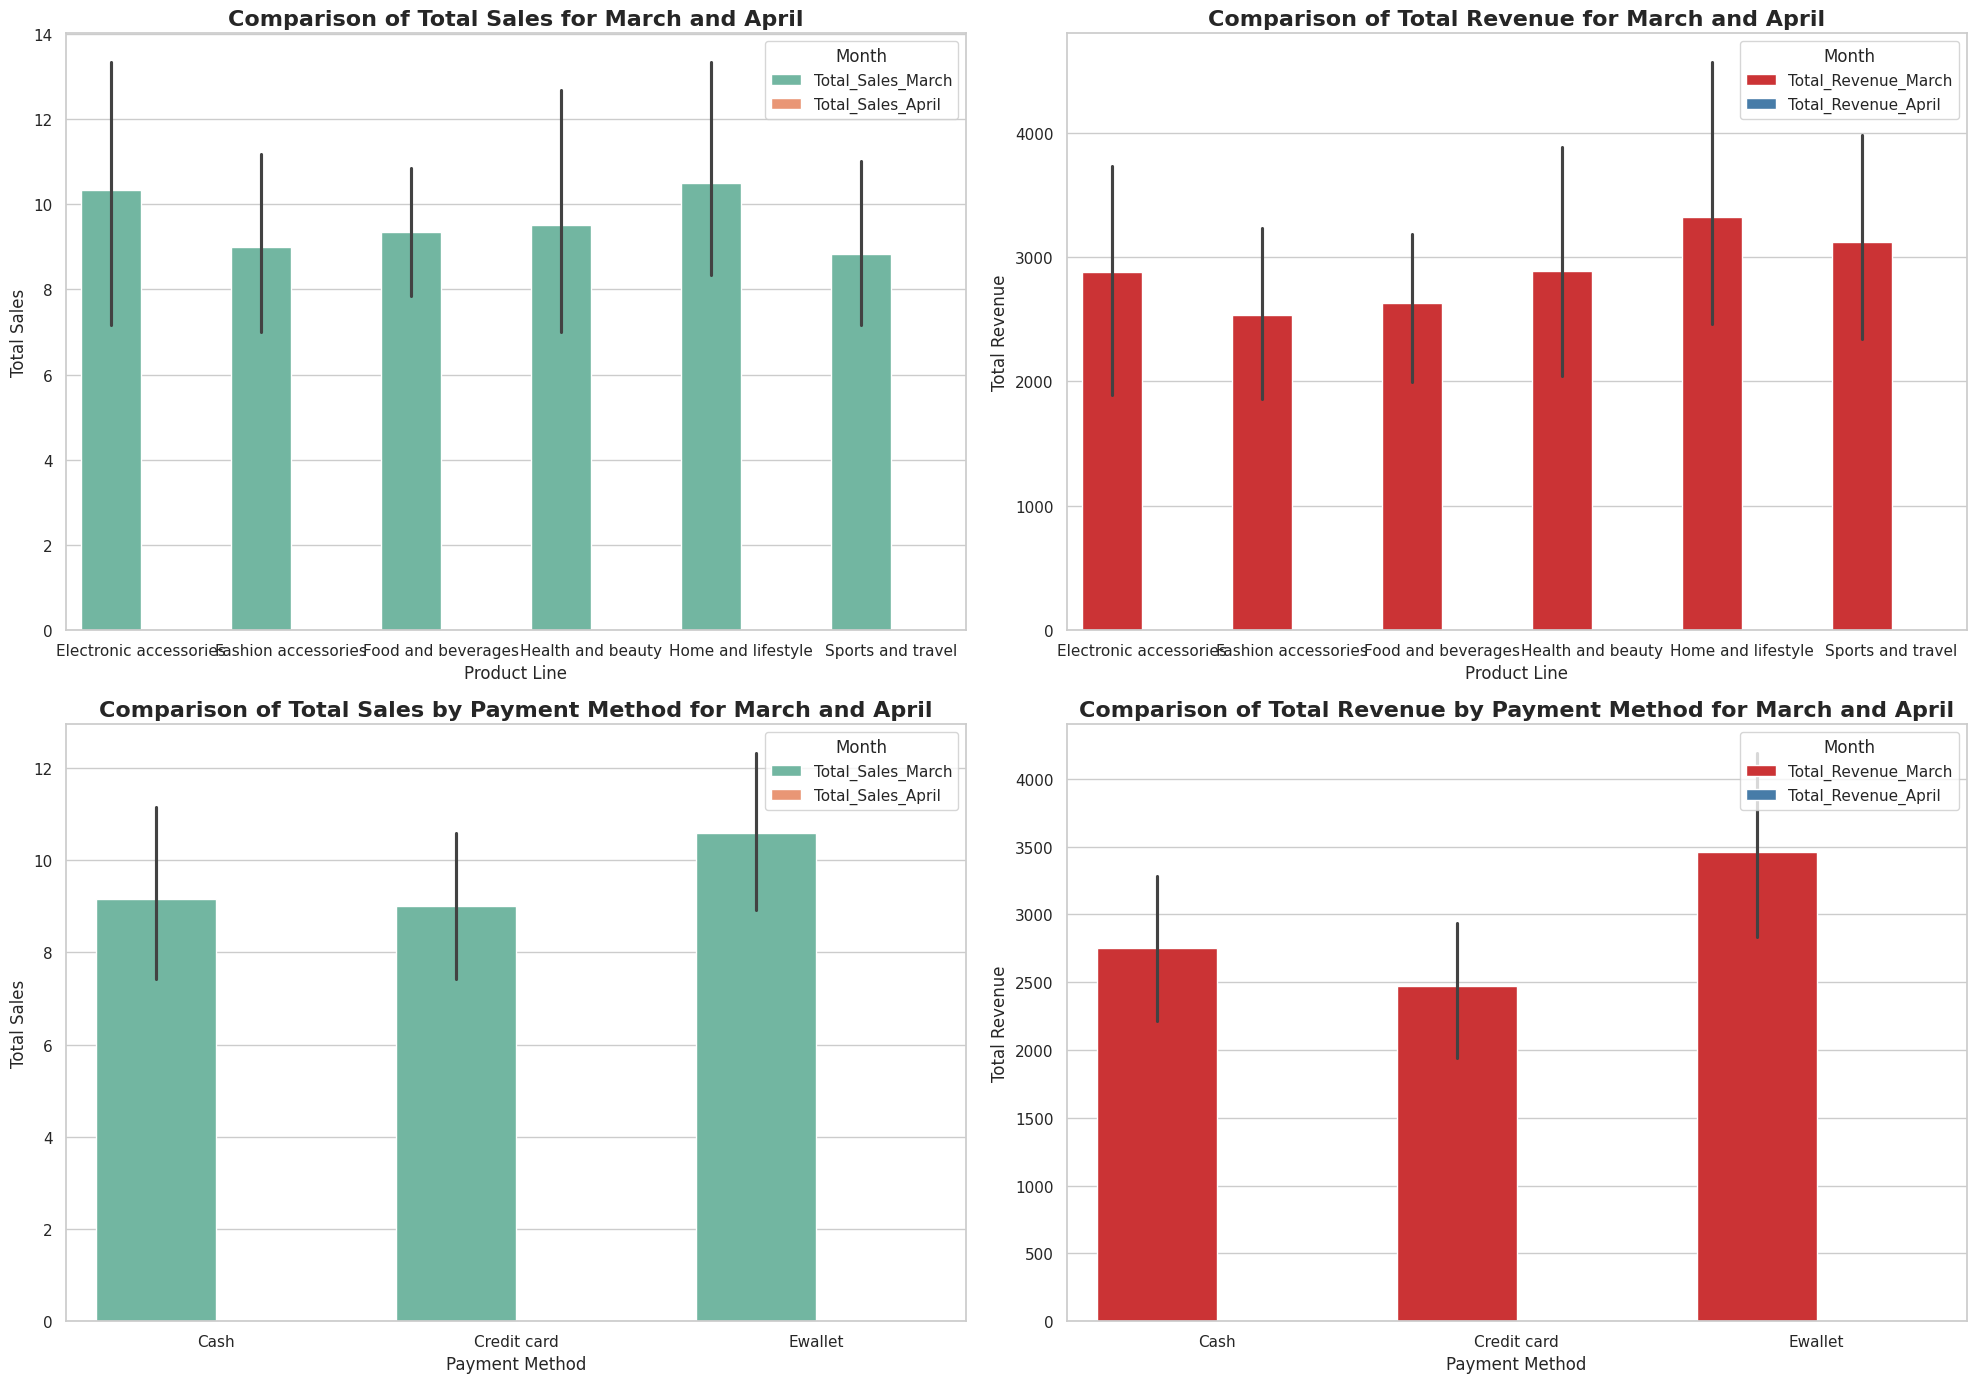

In [29]:
# Convert 'Date' to datetime and extract Month
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Month'] = data['Date'].dt.month

# Filter data for March and April
march_data = data[data['Month'] == 3]
april_data = data[data['Month'] == 4]

# Group by Product line, Gender, and Payment for March
march_performance = march_data.groupby(['Product line', 'Gender', 'Payment']).agg(
    Total_Sales_March=('Invoice ID', 'count'),
    Total_Revenue_March=('Revenue', 'sum')
).reset_index()

# Group by Product line, Gender, and Payment for April
april_performance = april_data.groupby(['Product line', 'Gender', 'Payment']).agg(
    Total_Sales_April=('Invoice ID', 'count'),
    Total_Revenue_April=('Revenue', 'sum')
).reset_index()

# Compare March and April performance to identify focus areas
focus_areas = pd.merge(march_performance, april_performance, on=['Product line', 'Gender', 'Payment'], how='outer').fillna(0)

# Set plot style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(20, 14))

# 1. Bar Plot for Total Sales Comparison
plt.subplot(2, 2, 1)
# Melt data for easier plotting
sales_melted = focus_areas.melt(id_vars=['Product line', 'Gender', 'Payment'],
                                value_vars=['Total_Sales_March', 'Total_Sales_April'],
                                var_name='Month', value_name='Total_Sales')
# Plot
sns.barplot(data=sales_melted, x='Product line', y='Total_Sales', hue='Month',
            palette="Set2", dodge=True)
plt.title('Comparison of Total Sales for March and April', fontsize=16, weight='bold')
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Month', loc='upper right')

# 2. Bar Plot for Total Revenue Comparison
plt.subplot(2, 2, 2)
# Melt data for easier plotting
revenue_melted = focus_areas.melt(id_vars=['Product line', 'Gender', 'Payment'],
                                  value_vars=['Total_Revenue_March', 'Total_Revenue_April'],
                                  var_name='Month', value_name='Total_Revenue')
# Plot
sns.barplot(data=revenue_melted, x='Product line', y='Total_Revenue', hue='Month',
            palette="Set1", dodge=True)
plt.title('Comparison of Total Revenue for March and April', fontsize=16, weight='bold')
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Month', loc='upper right')

# 3. Bar Plot for Total Sales Comparison by Payment Method
plt.subplot(2, 2, 3)
# Melt data for easier plotting
sales_payment_melted = focus_areas.melt(id_vars=['Payment', 'Product line', 'Gender'],
                                         value_vars=['Total_Sales_March', 'Total_Sales_April'],
                                         var_name='Month', value_name='Total_Sales')
# Plot
sns.barplot(data=sales_payment_melted, x='Payment', y='Total_Sales', hue='Month',
            palette="Set2", dodge=True)
plt.title('Comparison of Total Sales by Payment Method for March and April', fontsize=16, weight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Month', loc='upper right')

# 4. Bar Plot for Total Revenue Comparison by Payment Method
plt.subplot(2, 2, 4)
# Melt data for easier plotting
revenue_payment_melted = focus_areas.melt(id_vars=['Payment', 'Product line', 'Gender'],
                                           value_vars=['Total_Revenue_March', 'Total_Revenue_April'],
                                           var_name='Month', value_name='Total_Revenue')
# Plot
sns.barplot(data=revenue_payment_melted, x='Payment', y='Total_Revenue', hue='Month',
            palette="Set1", dodge=True)
plt.title('Comparison of Total Revenue by Payment Method for March and April', fontsize=16, weight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Month', loc='upper right')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


<ipython-input-30-36b5b6e111a2>:67: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 4)


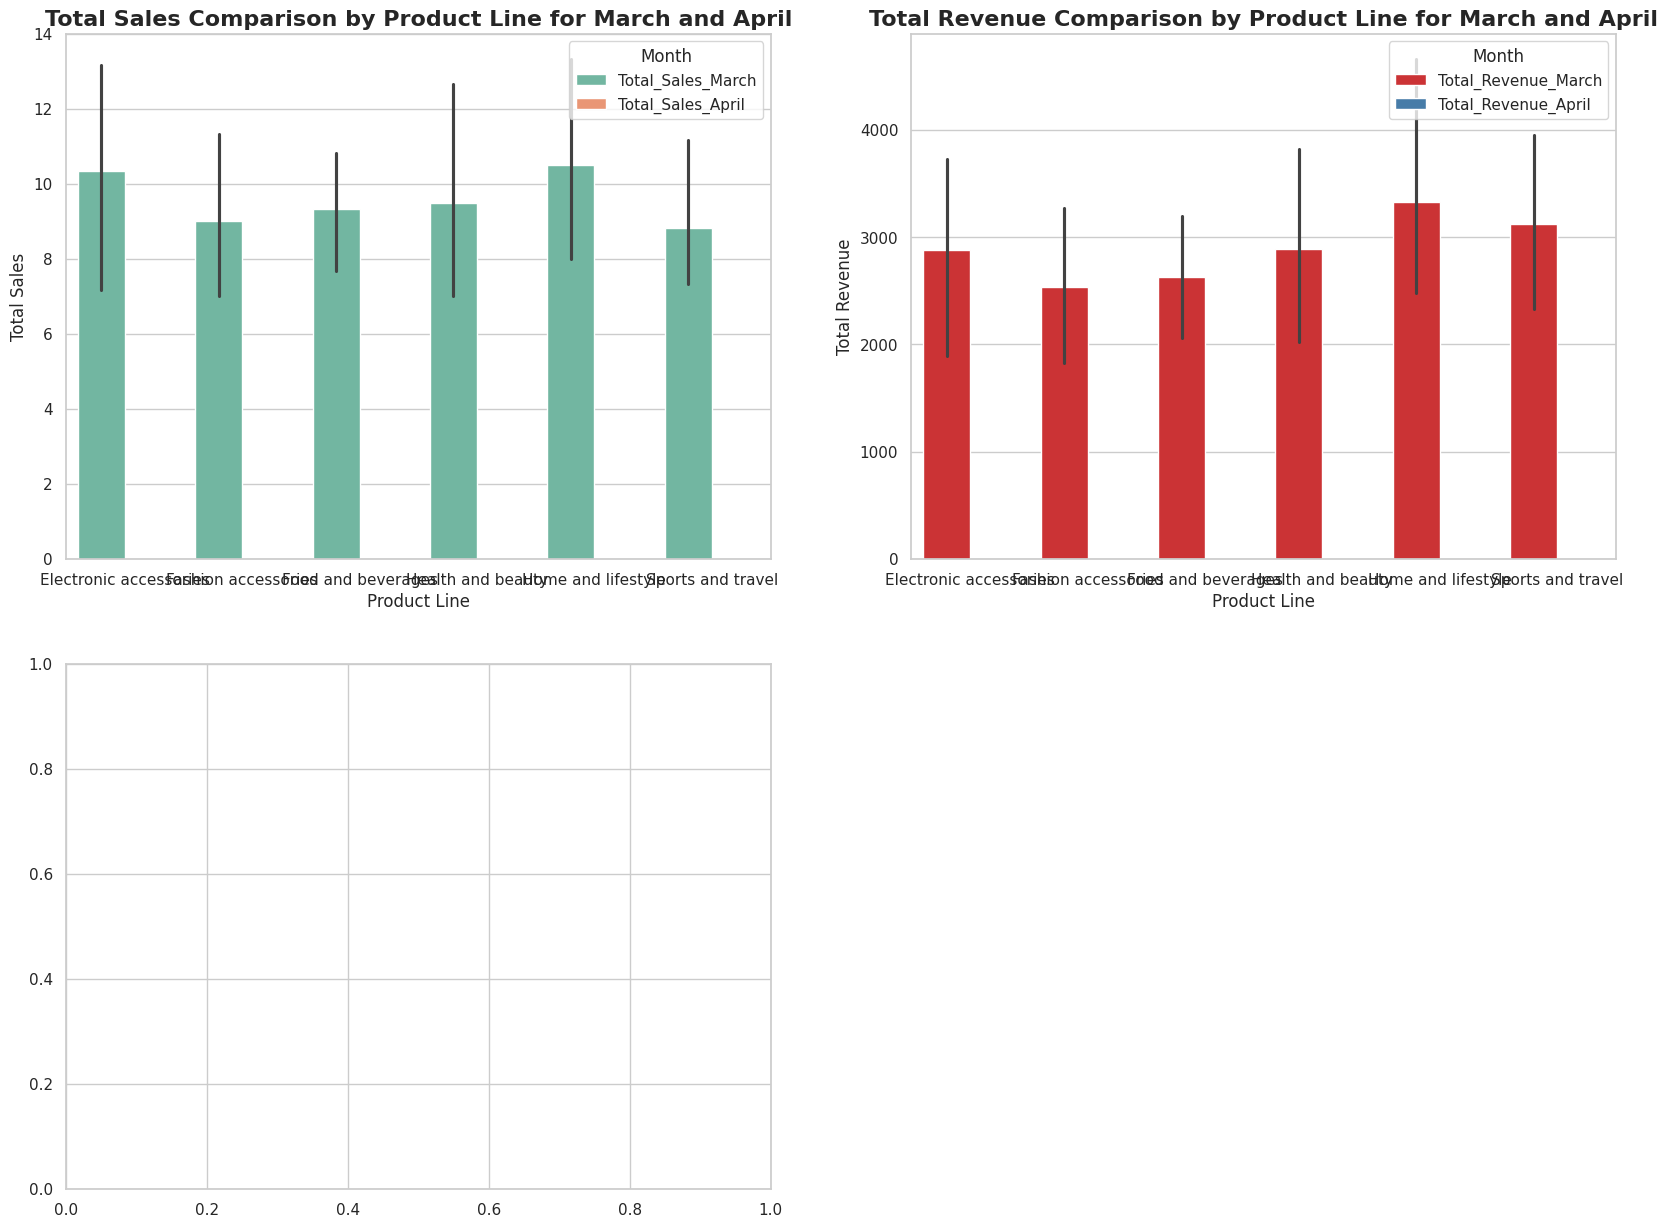

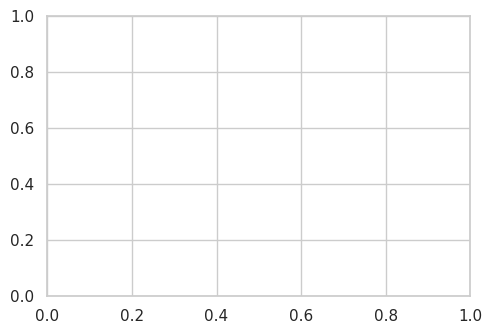

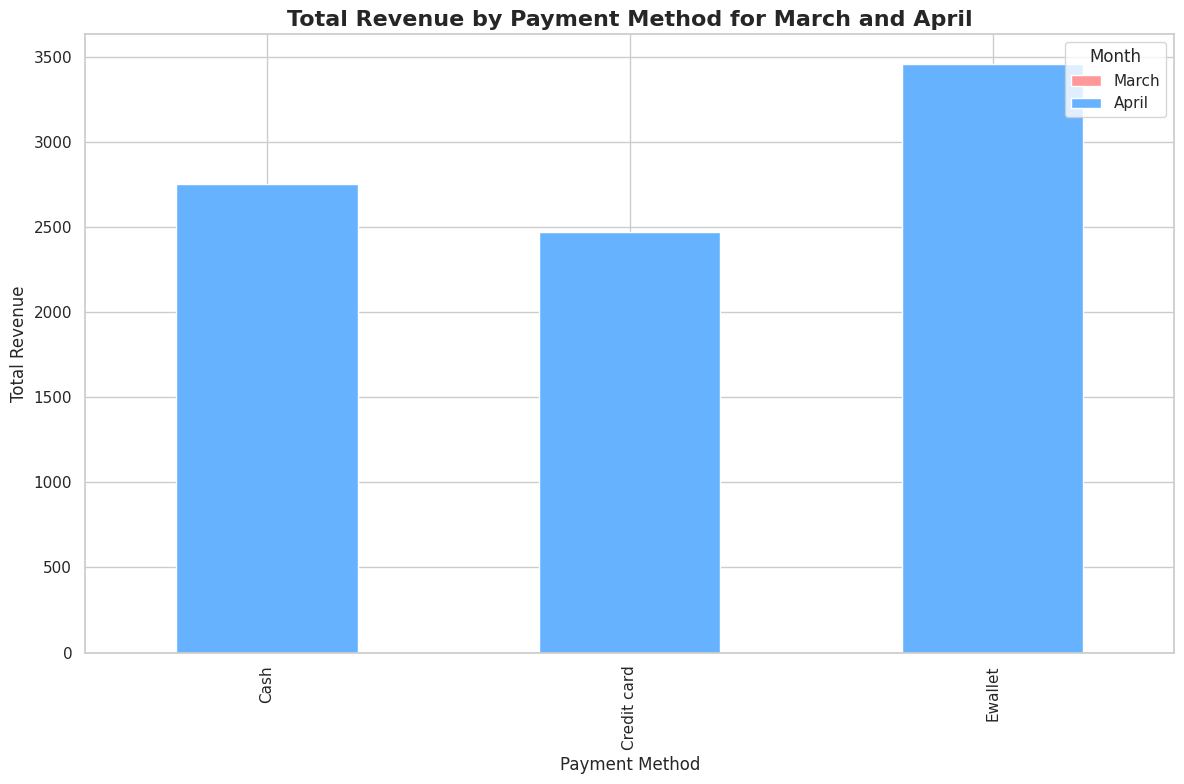

In [30]:
# Convert 'Date' to datetime and extract Month
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Month'] = data['Date'].dt.month

# Filter data for March and April
march_data = data[data['Month'] == 3]
april_data = data[data['Month'] == 4]

# Group by Product line, Gender, and Payment for March
march_performance = march_data.groupby(['Product line', 'Gender', 'Payment']).agg(
    Total_Sales_March=('Invoice ID', 'count'),
    Total_Revenue_March=('Revenue', 'sum')
).reset_index()

# Group by Product line, Gender, and Payment for April
april_performance = april_data.groupby(['Product line', 'Gender', 'Payment']).agg(
    Total_Sales_April=('Invoice ID', 'count'),
    Total_Revenue_April=('Revenue', 'sum')
).reset_index()

# Compare March and April performance to identify focus areas
focus_areas = pd.merge(march_performance, april_performance, on=['Product line', 'Gender', 'Payment'], how='outer').fillna(0)

# Set plot style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(20, 15))

# 1. Clustered Bar Plot for Total Sales Comparison by Product Line
plt.subplot(2, 2, 1)
sales_melted = focus_areas.melt(id_vars=['Product line'],
                                value_vars=['Total_Sales_March', 'Total_Sales_April'],
                                var_name='Month', value_name='Total_Sales')
sns.barplot(data=sales_melted, x='Product line', y='Total_Sales', hue='Month',
            palette="Set2", dodge=True)
plt.title('Total Sales Comparison by Product Line for March and April', fontsize=16, weight='bold')
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Month', loc='upper right')

# 2. Clustered Bar Plot for Total Revenue Comparison by Product Line
plt.subplot(2, 2, 2)
revenue_melted = focus_areas.melt(id_vars=['Product line'],
                                  value_vars=['Total_Revenue_March', 'Total_Revenue_April'],
                                  var_name='Month', value_name='Total_Revenue')
sns.barplot(data=revenue_melted, x='Product line', y='Total_Revenue', hue='Month',
            palette="Set1", dodge=True)
plt.title('Total Revenue Comparison by Product Line for March and April', fontsize=16, weight='bold')
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Month', loc='upper right')

# 3. Stacked Bar Plot for Total Sales Comparison by Payment Method
plt.subplot(2, 2, 3)
sales_payment_melted = focus_areas.melt(id_vars=['Payment'],
                                         value_vars=['Total_Sales_March', 'Total_Sales_April'],
                                         var_name='Month', value_name='Total_Sales')
sales_payment_pivot = sales_payment_melted.pivot_table(index='Payment', columns='Month', values='Total_Sales')
sales_payment_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#FF9999', '#66B2FF'])
plt.title('Total Sales by Payment Method for March and April', fontsize=16, weight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Month', labels=['March', 'April'], loc='upper right')

# 4. Stacked Bar Plot for Total Revenue Comparison by Payment Method
plt.subplot(2, 2, 4)
revenue_payment_melted = focus_areas.melt(id_vars=['Payment'],
                                           value_vars=['Total_Revenue_March', 'Total_Revenue_April'],
                                           var_name='Month', value_name='Total_Revenue')
revenue_payment_pivot = revenue_payment_melted.pivot_table(index='Payment', columns='Month', values='Total_Revenue')
revenue_payment_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#FF9999', '#66B2FF'])
plt.title('Total Revenue by Payment Method for March and April', fontsize=16, weight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Month', labels=['March', 'April'], loc='upper right')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


<ipython-input-38-f915f10d3446>:55: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


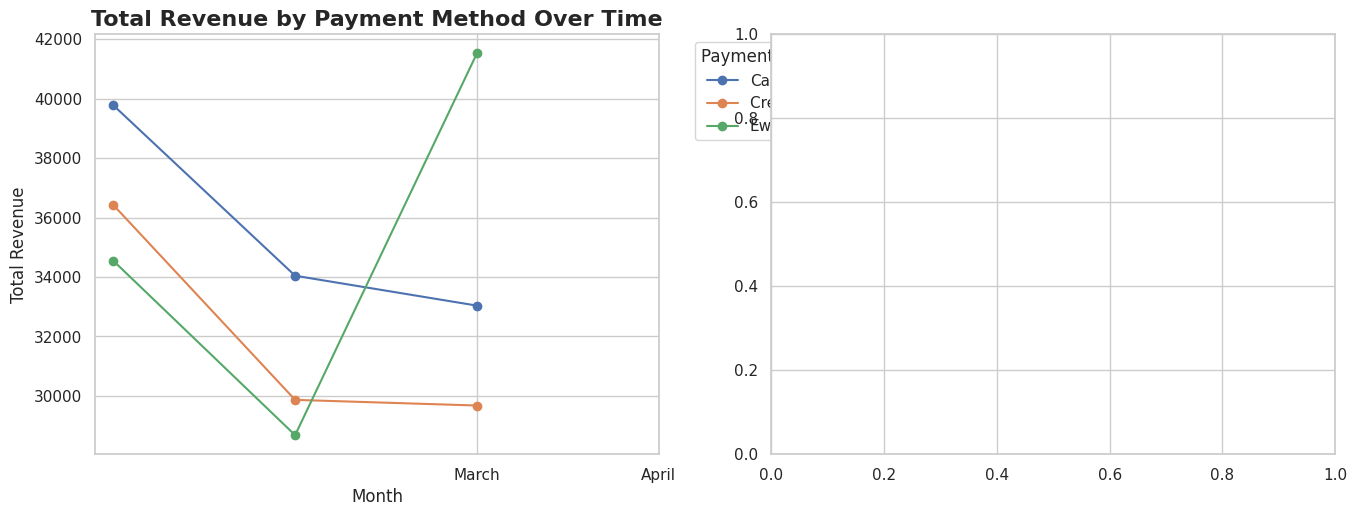

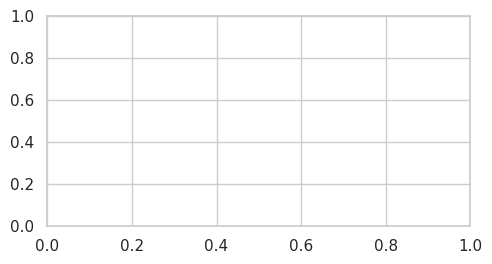

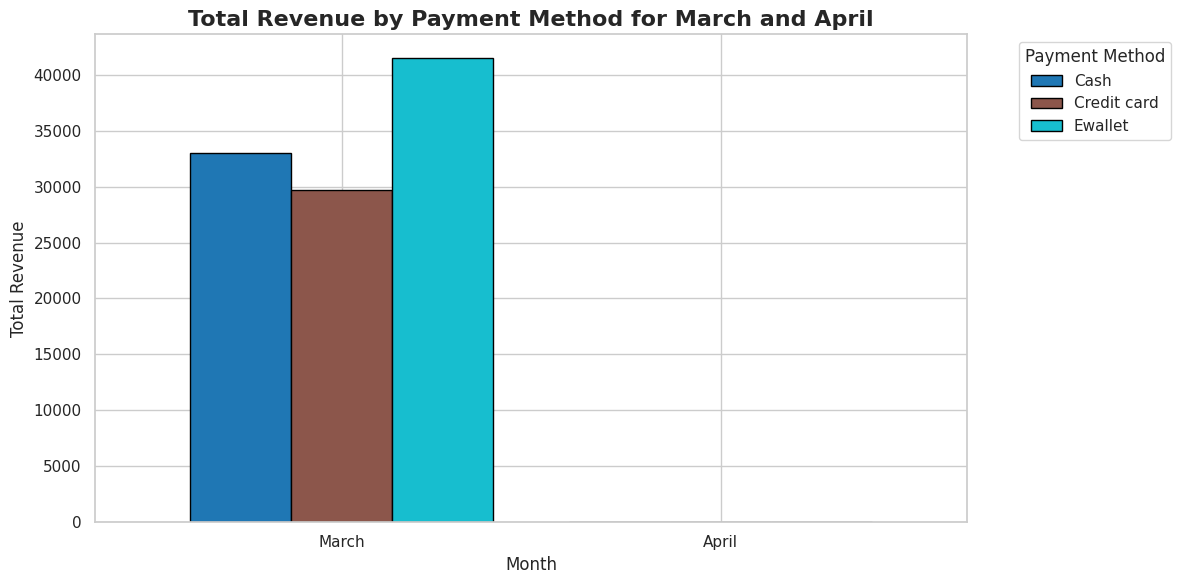

In [38]:
# Convert 'Date' to datetime and extract Month
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Month'] = data['Date'].dt.month

# Remove any leading/trailing spaces in the Payment column and ensure unique payment methods
data['Payment'] = data['Payment'].str.strip()

# Filter data for March and April
march_data = data[data['Month'] == 3]
april_data = data[data['Month'] == 4]

# Group by Payment method for March
march_payment_performance = march_data.groupby(['Payment']).agg(
    Total_Sales_March=('Invoice ID', 'count'),
    Total_Revenue_March=('Revenue', 'sum')
).reset_index()

# Group by Payment method for April
april_payment_performance = april_data.groupby(['Payment']).agg(
    Total_Sales_April=('Invoice ID', 'count'),
    Total_Revenue_April=('Revenue', 'sum')
).reset_index()

# Combine March and April data for payment methods
payment_performance = pd.merge(march_payment_performance, april_payment_performance, on='Payment', how='outer').fillna(0)

# Set plot style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(16, 12))

# 1. Line Plot for Total Revenue by Payment Method (Continuous Variable)
plt.subplot(2, 2, 1)
for payment in payment_performance['Payment']:
    monthly_revenue = data[data['Payment'] == payment].groupby('Month')['Revenue'].sum()
    plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', label=payment)
plt.title('Total Revenue by Payment Method Over Time', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks([3, 4], ['March', 'April'])

# 2. Grouped Bar Plot for Total Sales by Payment Method
plt.subplot(2, 2, 2)
sales_data = payment_performance.set_index('Payment')[['Total_Sales_March', 'Total_Sales_April']].T
sales_data.plot(kind='bar', width=0.8, figsize=(12, 6), colormap='tab10', edgecolor='black')
plt.title('Total Sales by Payment Method for March and April', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks([0, 1], ['March', 'April'], rotation=0)

# 3. Grouped Bar Plot for Total Revenue by Payment Method
plt.subplot(2, 2, 3)
revenue_data = payment_performance.set_index('Payment')[['Total_Revenue_March', 'Total_Revenue_April']].T
revenue_data.plot(kind='bar', width=0.8, figsize=(12, 6), colormap='tab10', edgecolor='black')
plt.title('Total Revenue by Payment Method for March and April', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks([0, 1], ['March', 'April'], rotation=0)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


sales forcestating at april

<ipython-input-46-8cf83d1f6fb4>:58: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 2)
<ipython-input-46-8cf83d1f6fb4>:68: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


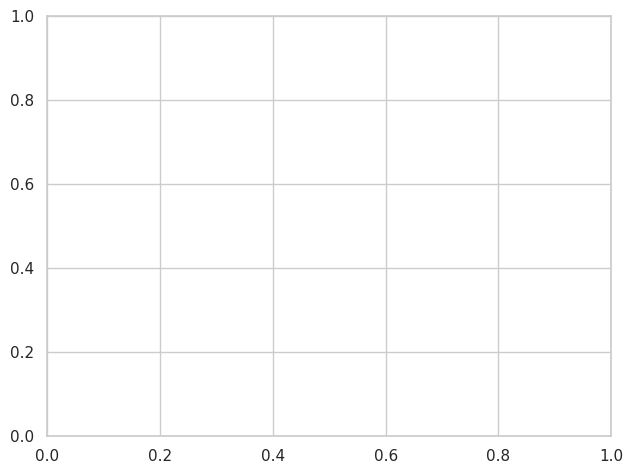

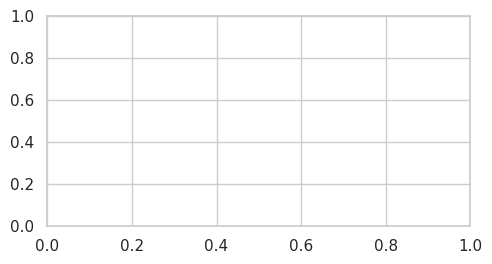

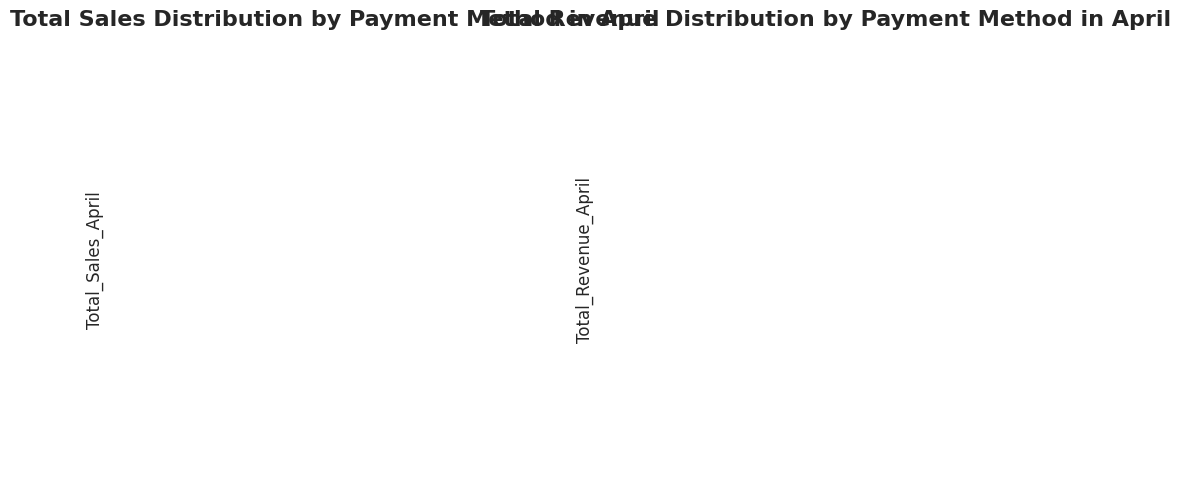

Focus Areas to Improve Sales and Revenue for April 2019:
       Payment  Sales_Gap  Revenue_Gap
0         Cash      344.0    106863.40
1  Credit card      311.0     95968.64
2      Ewallet      345.0    104755.34


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming you have a dataset with 1000 records in CSV format)
data = pd.read_excel('Walmart_Sales_CB1799BACC.xlsx')

# Add 'Revenue' column (Unit price * Quantity)
data['Revenue'] = data['Unit price'] * data['Quantity']

# Convert 'Date' to datetime and extract Month
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Month'] = data['Date'].dt.month

# Aggregate data for the first three months
first_three_months_data = data[data['Month'].isin([1, 2, 3])]
april_data = data[data['Month'] == 4]

# Compute total sales and revenue for January, February, and March
first_three_months_performance = first_three_months_data.groupby(['Payment']).agg(
    Total_Sales_First_Three_Months=('Invoice ID', 'count'),
    Total_Revenue_First_Three_Months=('Revenue', 'sum')
).reset_index()

# Compute total sales and revenue for April
april_performance = april_data.groupby(['Payment']).agg(
    Total_Sales_April=('Invoice ID', 'count'),
    Total_Revenue_April=('Revenue', 'sum')
).reset_index()

# Combine the first three months and April data
performance_comparison = pd.merge(first_three_months_performance, april_performance, on='Payment', how='outer').fillna(0)

# Identify areas where April performed worse
performance_comparison['Sales_Gap'] = performance_comparison['Total_Sales_First_Three_Months'] - performance_comparison['Total_Sales_April']
performance_comparison['Revenue_Gap'] = performance_comparison['Total_Revenue_First_Three_Months'] - performance_comparison['Total_Revenue_April']

# Filter out negative gaps (where April performed better)
performance_comparison = performance_comparison[(performance_comparison['Sales_Gap'] > 0) | (performance_comparison['Revenue_Gap'] > 0)]

# Set plot style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(16, 12))

# 1. Bar Plot for Sales Gap
plt.subplot(2, 2, 1)
sales_gap_data = performance_comparison[['Payment', 'Sales_Gap']].set_index('Payment')
sales_gap_data.plot(kind='bar', figsize=(12, 6), legend=False, colormap='tab10')
plt.title('Sales Gap Between First Three Months and April', fontsize=16, weight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Sales Gap', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# 2. Bar Plot for Revenue Gap
plt.subplot(2, 2, 2)
revenue_gap_data = performance_comparison[['Payment', 'Revenue_Gap']].set_index('Payment')
revenue_gap_data.plot(kind='bar', figsize=(12, 6), legend=False, colormap='tab10')
plt.title('Revenue Gap Between First Three Months and April', fontsize=16, weight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Revenue Gap', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# 3. Pie Chart for Total Sales in April by Payment Method
plt.subplot(2, 2, 3)
april_sales_pie = april_performance.set_index('Payment')['Total_Sales_April']
april_sales_pie.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), colormap='tab10', legend=True)
plt.title('Total Sales Distribution by Payment Method in April', fontsize=16, weight='bold')

# 4. Pie Chart for Total Revenue in April by Payment Method
plt.subplot(2, 2, 4)
april_revenue_pie = april_performance.set_index('Payment')['Total_Revenue_April']
april_revenue_pie.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), colormap='tab10', legend=True)
plt.title('Total Revenue Distribution by Payment Method in April', fontsize=16, weight='bold')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print focus areas
print("Focus Areas to Improve Sales and Revenue for April 2019:")
print(performance_comparison[['Payment', 'Sales_Gap', 'Revenue_Gap']])


<ipython-input-47-b2d318e11e6b>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment', y='Sales_Gap', data=performance_comparison, palette='viridis')
<ipython-input-47-b2d318e11e6b>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment', y='Revenue_Gap', data=performance_comparison, palette='viridis')


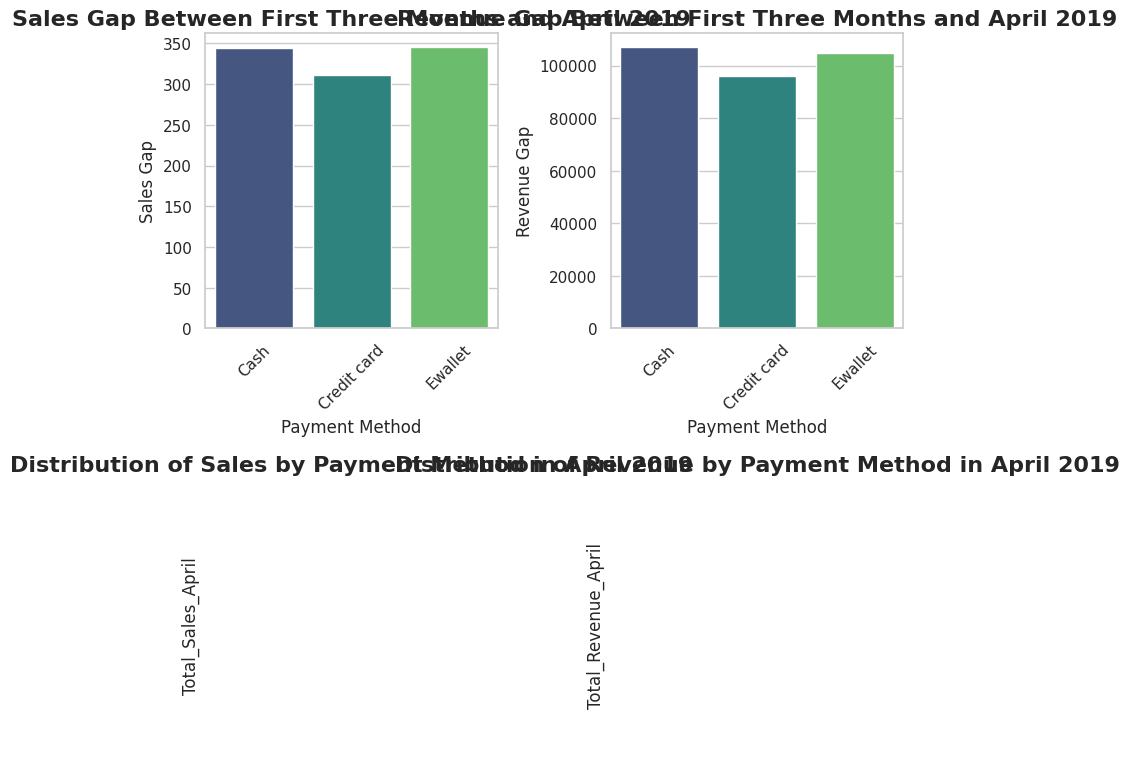

       Payment  Total_Sales_First_Three_Months  \
0         Cash                             344   
1  Credit card                             311   
2      Ewallet                             345   

   Total_Revenue_First_Three_Months  Total_Sales_April  Total_Revenue_April  \
0                         106863.40                0.0                  0.0   
1                          95968.64                0.0                  0.0   
2                         104755.34                0.0                  0.0   

   Sales_Gap  Revenue_Gap  
0      344.0    106863.40  
1      311.0     95968.64  
2      345.0    104755.34  


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel('Walmart_Sales_CB1799BACC.xlsx')

# Add 'Revenue' column (Unit price * Quantity)
data['Revenue'] = data['Unit price'] * data['Quantity']

# Convert 'Date' to datetime and extract Month
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Month'] = data['Date'].dt.month

# Aggregate sales and revenue for the first three months
first_three_months_data = data[data['Month'].isin([1, 2, 3])]
first_three_months_summary = first_three_months_data.groupby('Payment').agg(
    Total_Sales_First_Three_Months=('Invoice ID', 'count'),
    Total_Revenue_First_Three_Months=('Revenue', 'sum')
).reset_index()

# Aggregate sales and revenue for April
april_data = data[data['Month'] == 4]
april_summary = april_data.groupby('Payment').agg(
    Total_Sales_April=('Invoice ID', 'count'),
    Total_Revenue_April=('Revenue', 'sum')
).reset_index()

# Merge the data to compare
performance_comparison = pd.merge(
    first_three_months_summary,
    april_summary,
    on='Payment',
    how='outer',
    suffixes=('_First_Three_Months', '_April')
).fillna(0)

# Calculate gaps in sales and revenue
performance_comparison['Sales_Gap'] = performance_comparison['Total_Sales_First_Three_Months'] - performance_comparison['Total_Sales_April']
performance_comparison['Revenue_Gap'] = performance_comparison['Total_Revenue_First_Three_Months'] - performance_comparison['Total_Revenue_April']

# Set plot style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(16, 12))

# 1. Bar Plot for Sales Gap by Payment Method
plt.subplot(2, 2, 1)
sns.barplot(x='Payment', y='Sales_Gap', data=performance_comparison, palette='viridis')
plt.title('Sales Gap Between First Three Months and April 2019', fontsize=16, weight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Sales Gap', fontsize=12)
plt.xticks(rotation=45)

# 2. Bar Plot for Revenue Gap by Payment Method
plt.subplot(2, 2, 2)
sns.barplot(x='Payment', y='Revenue_Gap', data=performance_comparison, palette='viridis')
plt.title('Revenue Gap Between First Three Months and April 2019', fontsize=16, weight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Revenue Gap', fontsize=12)
plt.xticks(rotation=45)

# 3. Pie Chart for Distribution of Sales by Payment Method in April
plt.subplot(2, 2, 3)
april_summary.set_index('Payment')['Total_Sales_April'].plot(kind='pie', autopct='%1.1f%%', colormap='viridis', legend=True, figsize=(8, 8))
plt.title('Distribution of Sales by Payment Method in April 2019', fontsize=16, weight='bold')

# 4. Pie Chart for Distribution of Revenue by Payment Method in April
plt.subplot(2, 2, 4)
april_summary.set_index('Payment')['Total_Revenue_April'].plot(kind='pie', autopct='%1.1f%%', colormap='viridis', legend=True, figsize=(8, 8))
plt.title('Distribution of Revenue by Payment Method in April 2019', fontsize=16, weight='bold')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print performance comparison DataFrame
print(performance_comparison)


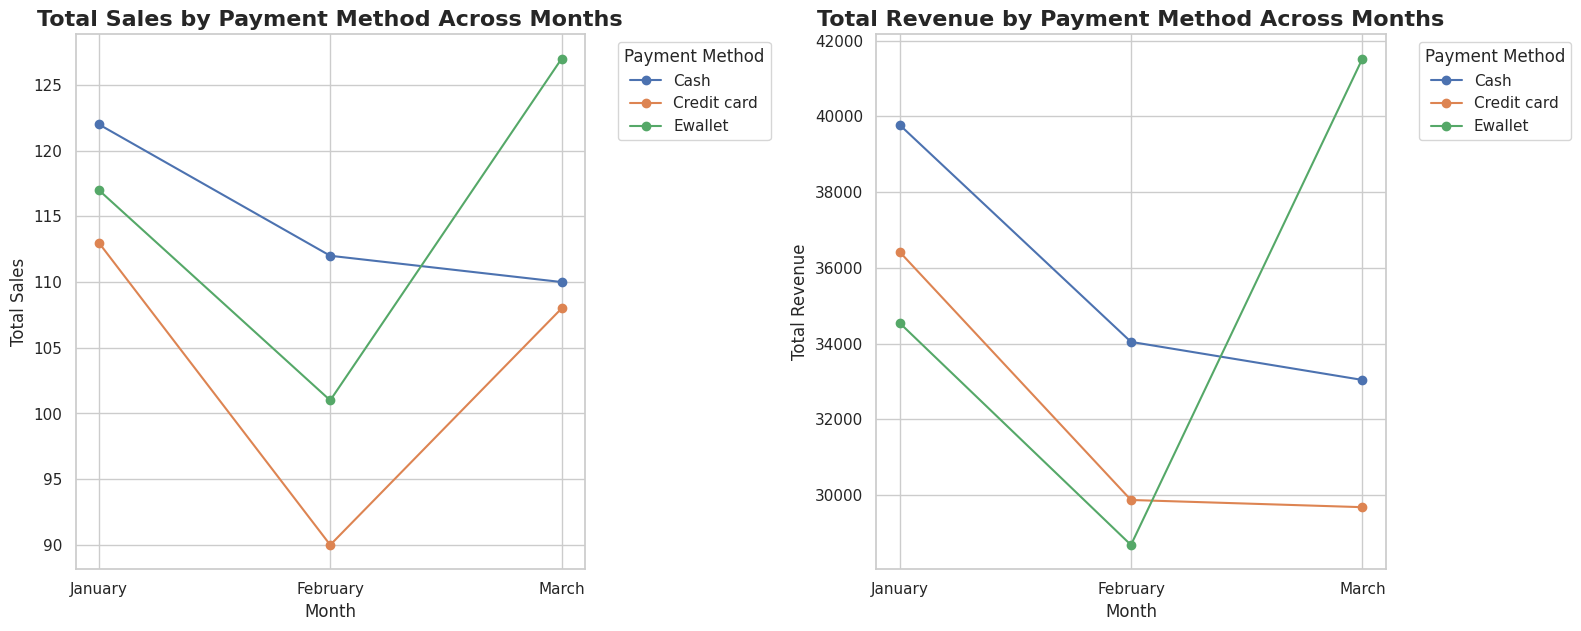

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel('Walmart_Sales_CB1799BACC.xlsx')

# Add 'Revenue' column (Unit price * Quantity)
data['Revenue'] = data['Unit price'] * data['Quantity']

# Convert 'Date' to datetime and extract Month
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Month'] = data['Date'].dt.month

# Aggregate sales and revenue for each month
monthly_summary = data.groupby(['Month', 'Payment']).agg(
    Total_Sales=('Invoice ID', 'count'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()

# Pivot the data to have months as rows and payment methods as columns
sales_pivot = monthly_summary.pivot_table(index='Month', columns='Payment', values='Total_Sales')
revenue_pivot = monthly_summary.pivot_table(index='Month', columns='Payment', values='Total_Revenue')

# Set plot style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(16, 12))

# 1. Line Plot for Sales Gap for Each Payment Method Across Months
plt.subplot(2, 2, 1)
for payment in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[payment], marker='o', label=payment)
plt.title('Total Sales by Payment Method Across Months', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks([1, 2, 3], ['January', 'February', 'March'])

# 2. Line Plot for Revenue Gap for Each Payment Method Across Months
plt.subplot(2, 2, 2)
for payment in revenue_pivot.columns:
    plt.plot(revenue_pivot.index, revenue_pivot[payment], marker='o', label=payment)
plt.title('Total Revenue by Payment Method Across Months', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks([1, 2, 3], ['January', 'February', 'March'])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


**. Strategies for Improvement
Promotional Campaigns:**

*Discounts and Offers:* Implement targeted promotions or discounts to attract customers and increase sales.
Advertising: Enhance marketing efforts to increase awareness and drive traffic.
Customer Engagement:

*Loyalty Programs:* Introduce or enhance loyalty programs to encourage repeat purchases.
Feedback Collection: Gather feedback from customers to understand their needs and preferences.
Product and Service Improvements:

*Product Quality:* Ensure product quality and address any customer complaints.
Customer Service: Improve customer service to enhance the overall shopping experience.
Sales Channels:

*Online Presence:* Strengthen online sales channels and digital marketing efforts.
New Markets: Explore new markets or expand into different regions.
Monitor and Adjust:

*Sales Tracking:* Continuously monitor sales and revenue metrics to identify trends and adjust strategies accordingly.
Performance Reviews: Regularly review performance and make data-driven decisions to address any issues.

<ipython-input-54-d46345834d7a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment', y='Sales_Gap', data=data, palette='viridis')
<ipython-input-54-d46345834d7a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment', y='Revenue_Gap', data=data, palette='viridis')


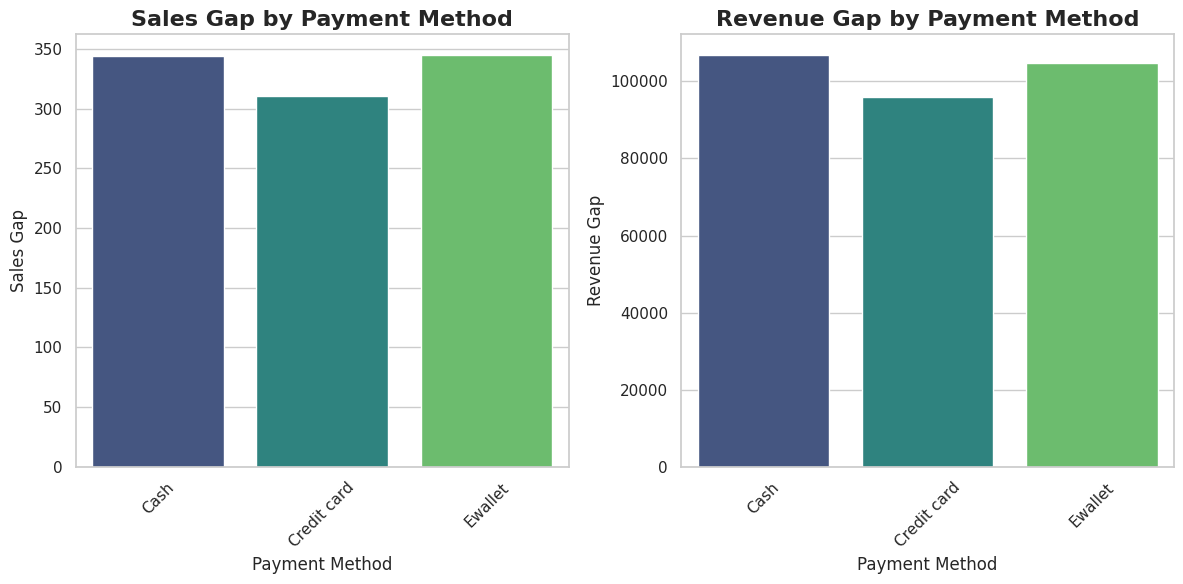

In [54]:
# payment gaps ananlysis
# Data preparation
data = pd.DataFrame({
    'Payment': ['Cash', 'Credit card', 'Ewallet'],
    'Total_Sales_First_Three_Months': [344, 311, 345],
    'Total_Revenue_First_Three_Months': [106863.40, 95968.64, 104755.34],
    'Total_Sales_April': [0.0, 0.0, 0.0],
    'Total_Revenue_April': [0.0, 0.0, 0.0],
    'Sales_Gap': [344.0, 311.0, 345.0],
    'Revenue_Gap': [106863.40, 95968.64, 104755.34]
})

# Set plot style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(12, 6))

# Bar Plot for Sales Gap
plt.subplot(1, 2, 1)
sns.barplot(x='Payment', y='Sales_Gap', data=data, palette='viridis')
plt.title('Sales Gap by Payment Method', fontsize=16, weight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Sales Gap', fontsize=12)
plt.xticks(rotation=45)

# Bar Plot for Revenue Gap
plt.subplot(1, 2, 2)
sns.barplot(x='Payment', y='Revenue_Gap', data=data, palette='viridis')
plt.title('Revenue Gap by Payment Method', fontsize=16, weight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Revenue Gap', fontsize=12)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [59]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Month,Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,13:08:00,Ewallet,9.1,2019-01,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,10:29:00,Cash,9.6,2019-03,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23:00,Credit card,7.4,2019-03,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,20:33:00,Ewallet,8.4,2019-01,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37:00,Ewallet,5.3,2019-02,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2019-01-29,13:46:00,Ewallet,6.2,2019-01,40.35
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,2019-03-02,17:16:00,Ewallet,4.4,2019-03,973.80
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2019-02-09,13:22:00,Cash,7.7,2019-02,31.84
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2019-02-22,15:33:00,Cash,4.1,2019-02,65.82


predict the salees in april months

<ipython-input-69-6d63853d7c65>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(autocorr_values)), autocorr_values, basefmt=" ", use_line_collection=True)


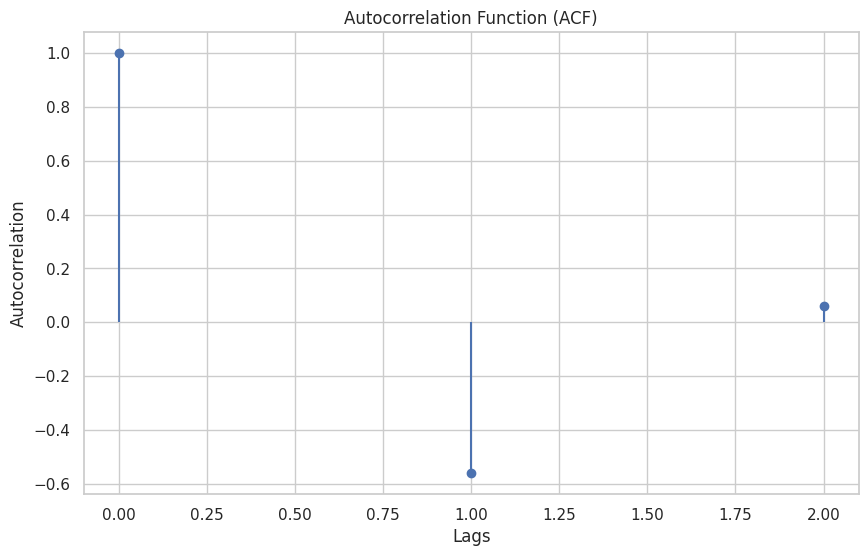

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Electronic accessories - MAE: 2.0002187652362977, RMSE: 2.0002187652362977


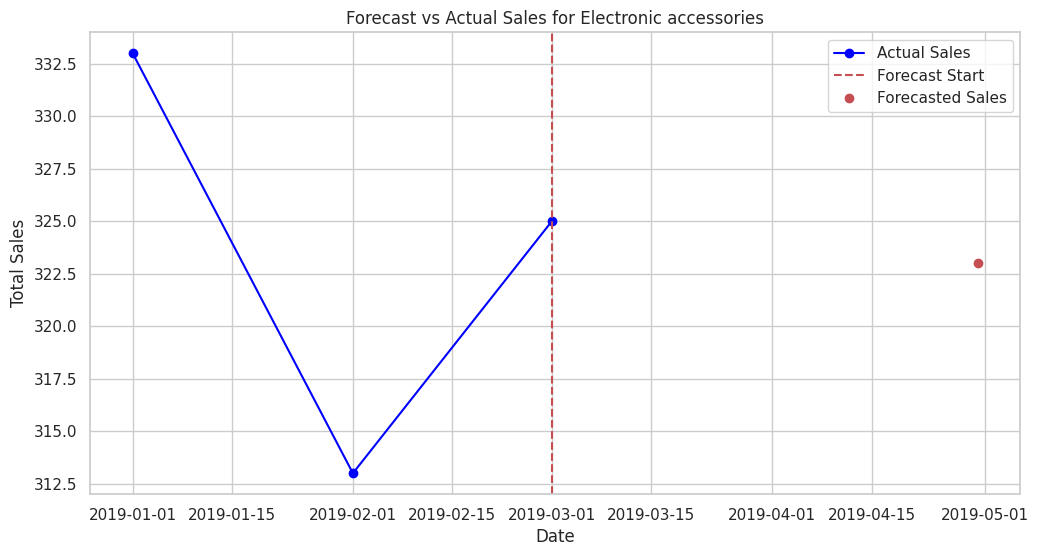

<ipython-input-69-6d63853d7c65>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(autocorr_values)), autocorr_values, basefmt=" ", use_line_collection=True)


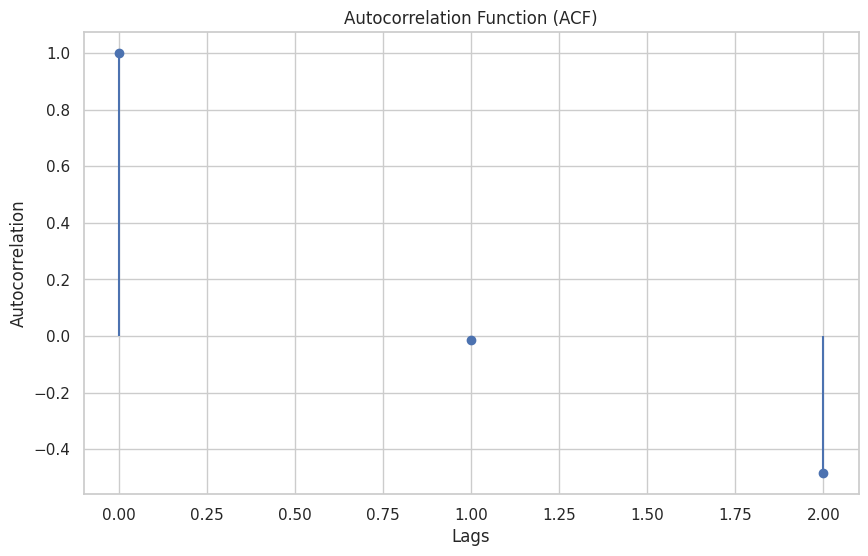

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Fashion accessories - MAE: 44.500267836002536, RMSE: 44.500267836002536


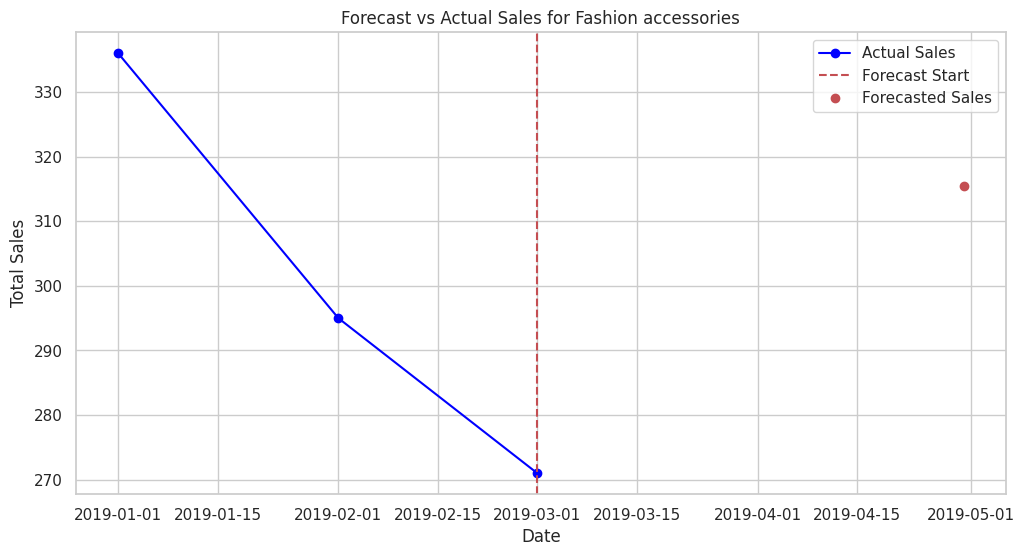

<ipython-input-69-6d63853d7c65>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(autocorr_values)), autocorr_values, basefmt=" ", use_line_collection=True)


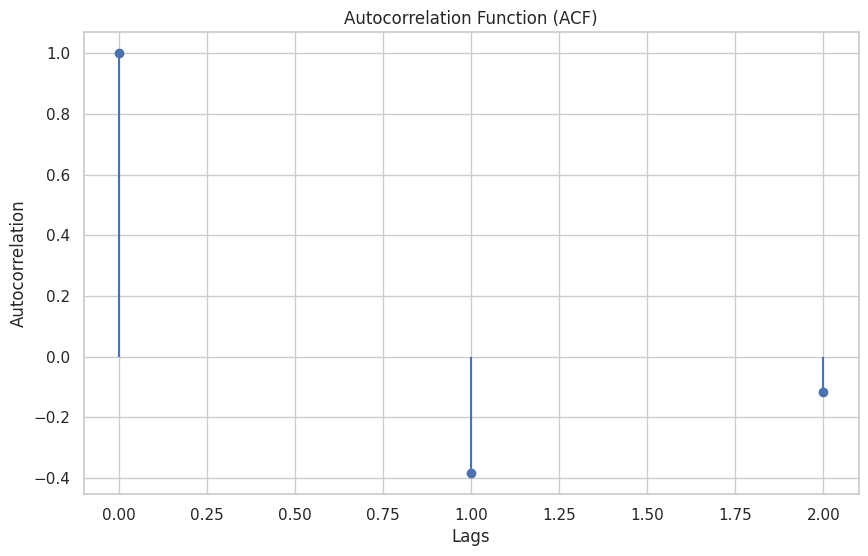

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Food and beverages - MAE: 58.998649310551116, RMSE: 58.998649310551116


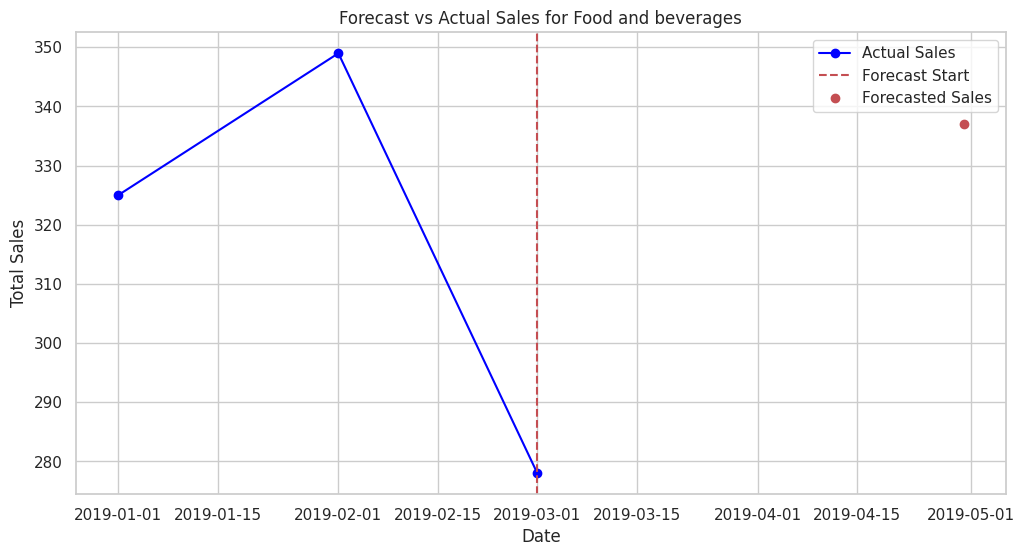

<ipython-input-69-6d63853d7c65>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(autocorr_values)), autocorr_values, basefmt=" ", use_line_collection=True)


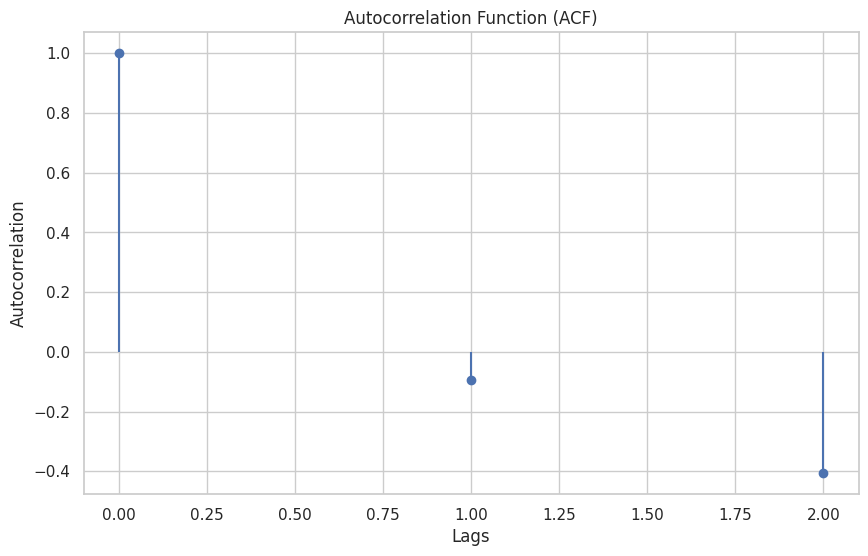

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Health and beauty - MAE: 73.99852947181984, RMSE: 73.99852947181984


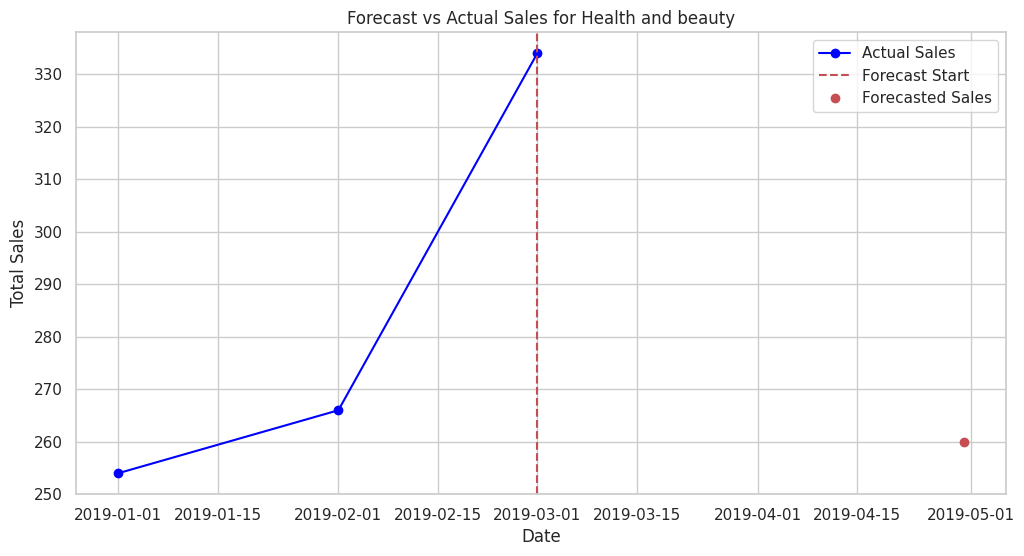

<ipython-input-69-6d63853d7c65>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(autocorr_values)), autocorr_values, basefmt=" ", use_line_collection=True)


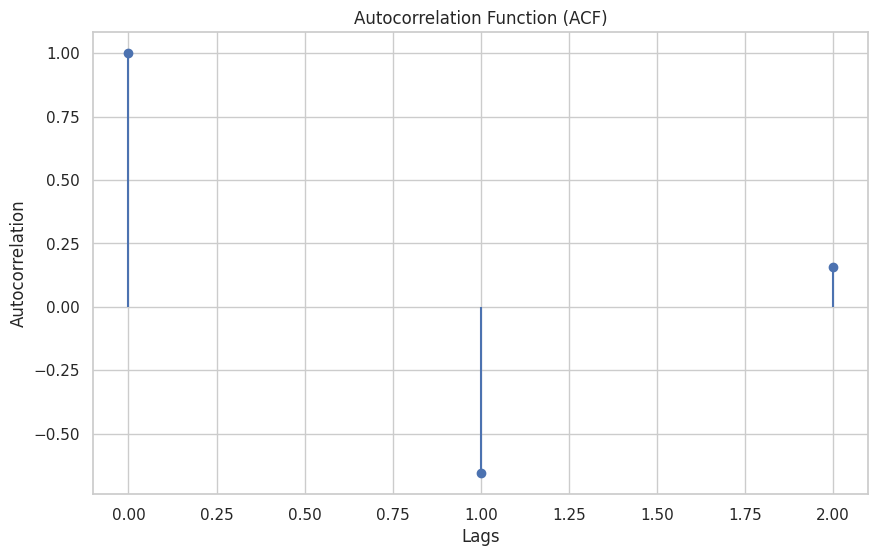

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Home and lifestyle - MAE: 90.48924847119679, RMSE: 90.48924847119679


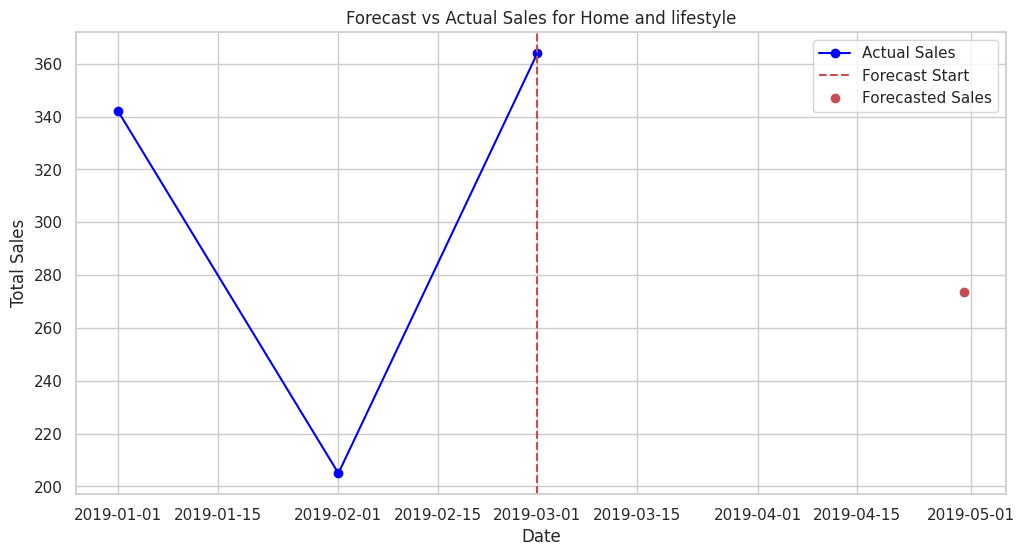

<ipython-input-69-6d63853d7c65>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(autocorr_values)), autocorr_values, basefmt=" ", use_line_collection=True)


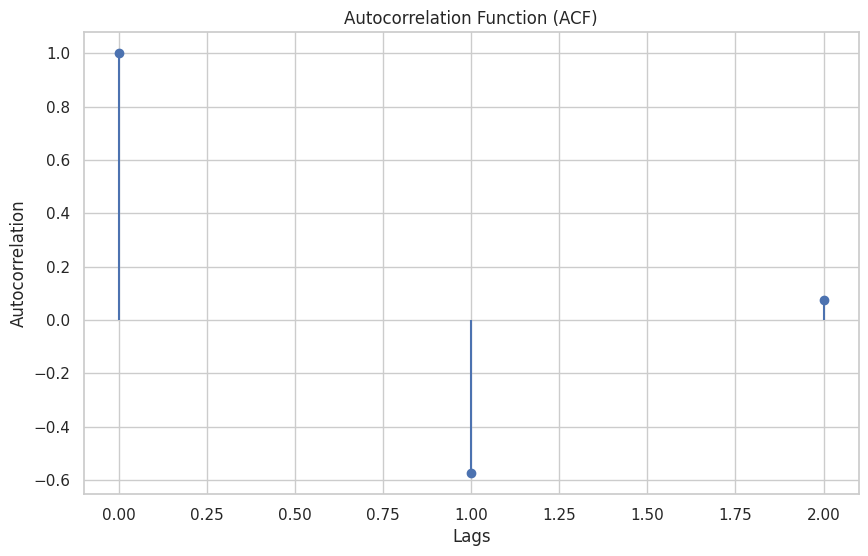

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Sports and travel - MAE: 18.508295788861858, RMSE: 18.508295788861858


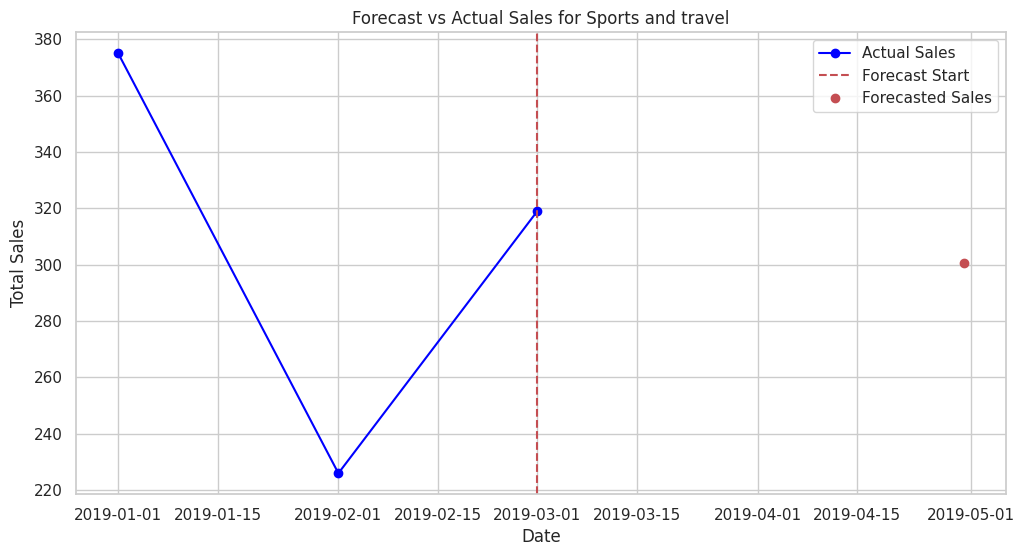

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
data = pd.read_excel('Walmart_Sales_CB1799BACC.xlsx')

# Convert 'Date' to datetime and extract Month
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Month'] = data['Date'].dt.to_period('M')
data['Revenue'] = data['Unit price'] * data['Quantity']

# Aggregate data by Month and Product Line
monthly_data = data.groupby(['Month', 'Product line']).agg(
    Total_Sales=('Quantity', 'sum'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()

# Ensure data is sorted by Month
monthly_data.sort_values(by=['Product line', 'Month'], inplace=True)
monthly_data.set_index('Month', inplace=True)

# Function to plot ACF
def plot_acf(data, lags=20):
    plt.figure(figsize=(10, 6))
    autocorr_values = acf(data.dropna(), nlags=lags)
    plt.stem(range(len(autocorr_values)), autocorr_values, basefmt=" ", use_line_collection=True)
    plt.title('Autocorrelation Function (ACF)')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()

# Function to fit MA model
def fit_ma_model(data, order=(0, 0, 1)):  # ARIMA model with d=0 (MA model)
    try:
        model = ARIMA(data.dropna(), order=order)
        model_fit = model.fit()
        return model_fit
    except Exception as e:
        print(f'Error fitting MA model: {e}')
        return None

# Function to evaluate the model
def evaluate_model(model_fit, data):
    if model_fit is not None:
        predictions = model_fit.get_forecast(steps=1).predicted_mean
        actual = data.iloc[-1]  # Last value in the original data
        mae = mean_absolute_error([actual], predictions)
        rmse = np.sqrt(mean_squared_error([actual], predictions))
        return mae, rmse
    return None, None

# Function to plot forecasts
def plot_forecasts(product, model_fit, data):
    if model_fit is not None:
        forecast_index = pd.date_range(start=data.index[-1].to_timestamp(), periods=2, freq='M')[1]
        forecast = model_fit.get_forecast(steps=1).predicted_mean

        plt.figure(figsize=(12, 6))
        plt.plot(data.index.to_timestamp(), data, label='Actual Sales', marker='o', color='blue')
        plt.axvline(x=data.index[-1].to_timestamp(), color='r', linestyle='--', label='Forecast Start')
        plt.plot(forecast_index, forecast, 'ro', label='Forecasted Sales')
        plt.title(f'Forecast vs Actual Sales for {product}')
        plt.xlabel('Date')
        plt.ylabel('Total Sales')
        plt.legend()
        plt.grid(True)
        plt.show()

# Forecasting and evaluation for each product line
forecasts = {}
for product in monthly_data['Product line'].unique():
    product_data = monthly_data[monthly_data['Product line'] == product]['Total_Sales']

    if len(product_data) > 2:  # Ensure there is enough data to fit the model
        # Plot ACF
        plot_acf(product_data)

        # Fit MA model
        model_fit = fit_ma_model(product_data, order=(0, 0, 1))  # Adjust order if needed
        forecasts[product] = model_fit

        # Evaluate model
        mae, rmse = evaluate_model(model_fit, product_data)
        if mae is not None:
            print(f'{product} - MAE: {mae}, RMSE: {rmse}')

        # Plot forecasts
        plot_forecasts(product, model_fit, product_data)
    else:
        print(f'Insufficient data for {product} to perform forecasting.')
